In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import random
from manofunkcijos import *

import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver # naršyklės kontroleris
from selenium.webdriver.chrome.options import Options #Naršyklės
# pip install beautifulsoup4 selenium
import time

In [ ]:
# Informacijos gavimas iš aruodas.lt
# Užduotys
# Naudodamiesi selenium, beautifulsoup bibliotekomis bei pasirinkta naršykle, nuskaitykite
# aruodas.lt skelbimų informaciją. Apsiribokite tik parduodamų bei nuomojamų butų skelbi-
# mais, vystytojų (naujų NT objektų) pasiūlymus atmeskite.

# Nuskaityta informacija turi būti saugoma jūsų susikurtoje SQLite duomenų bazėje (DB).

# Jūsų skriptas turi surinkti ir į DB surašyti visą reikiamą infromaciją, kuri būtų reikalinga toli-
# mesnei analizei. Vizualizacijoms/analizei duomenis toliau turite imti iš savo užpildytos SQLi-
# te DB.

# Palyginkite Vilniaus, Kauno, Klaipėdos, Palangos ir pasirinktinai savo nuožiūra dar vieno
# miesto NT rinką.

# Atskiras nurodymas dėl web-scraper’io: Jūs turite turėti galimybę a) pradėti duomenų rin-
# kimą b) apriboti duomenų rinkimą arba laiku (kiek laiko minutėmis, valandomis turi veikti

# rinkimas), arba skelbimų kiekiu (kiek skelbimų turi surinkti vieno paleidimo metu) c) pra-
# tęsti nutrauką duomenų rinkimą d) Darbo pradžioje skriptas turi sukurti visas jam reikalingas

# duomenų bazės lenteles. e) Turite galėti nurodyti skriptui, kokius miestus jis turi analizuoti.
# Turite gebėti nurodyti
# • a) visus
# • b) kelis
# • c) vieną miestą.
# f) jei tęsiamas darbas - ankstesni duomenys neturi dingti g) jei nurodoma, jog tai yra darbo
# pradžia - surinkti duomenys yra panaikinami - duomenų bazės lentelės turi būti perkuriamos
# iš naujo.
# Klausimai:

# Palyginkite vidutinį NT plotą tarp skirtingų miestų. Koks NT plotas yra dažniausiai pasitai-
# kantis lyginamuose miestuose? NT plotą apvalinkite 5 m2

# intervalais. Koks vidutinis am-
# žius/statybos metai NT objektų? Ar yra skirtumas tarp nuomojamų bei parduodamų butų?

# Kaip priklauso vidutinė kaina nuo NT objektų energetinės klasės? (A, A+, A++)? Ar yra
# priklausomybė tarp vidutinės kainos ir įrengto šildymo (kolektorinis, centrinis, grindinis ...)?
# Kuriuose lyginamuose miestuose didžiausias/mažiausias kainų išsibarstymas? Ar yra kokia
# nors priklausomybė tarp kainos ir pastato tipo (Mūrinis, blokinis), pastato amžiaus? Ar yra
# priklausomybė tarp pastato aukščio (aukštais), buto padėties pastate (kuriame aukšte jis yra)
# ir buto kainos?

# 3

# Pasirinkite vieną miestą, ir palyginkite to miesto mikrorajonų NT rinką pagal NT objek-
# tų kiekį, amžių, vidutinę kainą, plotų, kainų išsibarstymą, dažniausiai pasitaikančius plotus.

# Raskite pigiausius/brangiausius mikrorajonus. Atvaizduokite su scatter_mapbox kiekvieno
# mikrorajono NT objektų kiekį - scatter’io dydis turi būti proporcingas NT objektų kiekiui
# mikrorajone, o scatter’io spalva - kainų lygiui.
# Panaudokite pie-of-pie, bar-of-pie grafikus. Panaudokite plotly.express scatter_mapbox ir

# su juo atvaizduokite NT objektų kiekį 6-iuose miestuose - scatter’io dydis turi būti proporcin-
# gas NT objektų kiekiui rodomame mieste.

# Koordinačių gavimas iš adreso https://nominatim.org/.
# Visiems klausimams parinkite ir pateikite vizualizacijas, leidžiančias atsakyti į klausimus.
# Vizualizacijas pateikti streamlit aplinkoje.

In [3]:
Objekto_tipai = {'Butai pardavimui':'butai', 'Butai nuomai':'butu-nuoma'}
Miestai = {'Kaunas':'kaune', 'Vilnius':'vilniuje', 'Klaipėda':'klaipedoje', 'Šiauliai':'siauliuose', 'Panevėžys':'panevezyje', 'Alytus':'alytuje', 'Palanga':'palangoje'}
for obj in Objekto_tipai.keys():
    print(Objekto_tipai[obj])
    puslapis = 1
    opcijos = Options()
    opcijos.add_argument('--incognito')
    driver = webdriver.Chrome(options=opcijos)
    url = f'https://www.aruodas.lt/{Objekto_tipai[obj]}/puslapis/{puslapis}/?FOwnerDbId0=1&FOwnerDbId2=1'
    driver.get(url)
    time.sleep(3)
    source = driver.page_source
    bs = BeautifulSoup(source, 'html.parser')
    first = bs.find('div', {'class':'markTexts'})
    skelbimai = first.find('div', {'class':'number'})
    puslapiai = int(int(skelbimai.text.strip().replace('(','').replace(')',''))/25)
    for puslapis in range(puslapiai):
        puslapis = puslapis + 1
        url = f'https://www.aruodas.lt/{Objekto_tipai[obj]}/puslapis/{puslapis}/?FOwnerDbId0=1&FOwnerDbId2=1'
        driver.get(url)
        source = driver.page_source
        bs = BeautifulSoup(source, 'html.parser')
        skelbimas = bs.find_all('div', {'class':'list-adress-v2'})
        for s in skelbimas:
            try:
                # if not check_if_value_exists_or_max('../../../web_scrap.db','aruodas','URL',url):
                if True:
                    skelbimai = {}
                    url = s.find('a')['href']
                    print(url)
                    skelbimai['Miestas'] = s.find('a').text.strip()
                    skelbimai['Kaina'] = s.find_all('span', {'class':'list-item-price-v2'})[0].text.strip().replace(' ','')[:-1]
                    driver.get(url)
                    source = driver.page_source
                    bs = BeautifulSoup(source, 'html.parser')
                    pav = bs.find('dl', {'class':'obj-details'}).find_all('dt')
                    values = bs.find('dl', {'class':'obj-details'}).find_all('dd')
                    skelbimai['Adresas'] = bs.find('h1', {'class':'obj-header-text'}).text.strip()
                    for p, v in zip(pav,values):
                        skelbimai[p.text.strip()[:-1]] = v.text.strip()
                    skelbimai['URL'] = url
                    insert_into_db(skelbimai,'../../../web_scrap.db','aruodas')
            except Exception as e:
                print(e)
    driver.close()


butai


KeyboardInterrupt: 

In [3]:
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM aruodas;'

df = query_to_dataframe(db_path, query)

In [115]:
df.head()

id                              Miestas   Kaina  \
0   1          Vilnius, ŽirmūnaiRiterių g.  165000   
1   2   Palanga, PalangaA. Mickevičiaus g.  268000   
2   3  Vilnius, PašilaičiaiPerkūnkiemio g.  163000   
3   4        Palanga, PalangaMedvalakio g.   62800   
4   5        Palanga, PalangaMedvalakio g.   27700   

                                             Adresas Namo numeris  \
0    Vilnius, Žirmūnai, Riterių g., 2 kambarių butas           10   
1  Palanga, Palanga, A. Mickevičiaus g., 2 kambar...         None   
2  Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...           53   
3  Palanga, Palanga, Medvalakio g., 2 kambarių butas           27   
4  Palanga, Palanga, Medvalakio g., 1 kambario butas           27   

  Buto numeris    Plotas Kambarių sk. Aukštas Aukštų sk.  ...  \
0          127  40,52 m²            2       5          8  ...   
1         None     35 m²            2       1          3  ...   
2         None     67 m²            3       8         12  ...   
3         None   26,2 m²            2       1          2  ...   
4         None     14 m²            1       2          2  ...   

                                                 URL             Tipas  \
0  https://www.aruodas.lt/butai-vilniuje-zirmunuo...  Butai pardavimui   
1  https://www.aruodas.lt/butai-palangoje-palango...  Butai pardavimui   
2  https://www.aruodas.lt/butai-vilniuje-pasilaic...  Butai pardavimui   
3  https://www.aruodas.lt/butai-palangoje-palango...  Butai pardavimui   
4  https://www.aruodas.lt/butai-palangoje-palango...  Butai pardavimui   

                                            Ypatybės  \
0                                               None   
1  Nauja kanalizacija\nNauja elektros instaliacij...   
2  Tualetas ir vonia atskirai\nInternetas\nKabeli...   
3                                               None   
4                                               None   

                       Papildomos patalpos  \
0                                     None   
1  Sandėliukas\nTerasa\nVieta automobiliui   
2          Sandėliukas\nVieta automobiliui   
3                                     None   
4                                     None   

                                    Papildoma įranga  \
0                                               None   
1  Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...   
2  Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...   
3                                               None   
4                                               None   

                                             Apsauga  \
0                                               None   
1  Šarvuotos durys\nSignalizacija\nKodinė laiptin...   
2            Šarvuotos durys\nKodinė laiptinės spyna   
3                                               None   
4                                    Šarvuotos durys   

  Unikalus daikto numeris (RC numeris) Objektas Kaina mėn.  \
0                                 None     None       None   
1                                 None     None       None   
2                                 None     None       None   
3                                 None     None       None   
4                                 None     None       None   

  Bendros erdvės pastate  
0                   None  
1                   None  
2                   None  
3                   None  
4                   None  

[5 rows x 25 columns]

In [4]:
def sildymas(x):
    if x == None:
        return x
    else:
        if len(x.split(',')) == 1:
            return x.split(',')[0]
        else: 
            return 'Hibridinis'

In [5]:
def amzius(x):
    if x == None:
        return x
    else:
        if int(x)>=2024:
            return 0
        else:
            return 2024-int(x)

In [22]:
aruodas_df = df

In [23]:
aruodas_df['Plotas_n'] = aruodas_df['Plotas'].apply(lambda x: x.replace(',','.').split()[0] if x!=None else x)

In [24]:
aruodas_df['Miestas_n'] = aruodas_df['Miestas'].apply(lambda x: x.split(',')[0])
aruodas_df['Mikrorajonas'] = aruodas_df['Adresas'].apply(lambda x: x.split(',')[1])
aruodas_df['Kaina_n'] = aruodas_df['Kaina'].apply(lambda x: float(x) if x != None else x)
aruodas_df['Šildymo_tipas'] = aruodas_df['Šildymas'].apply(sildymas)
aruodas_df['Adresas_n'] = aruodas_df['Adresas'].apply(lambda x: ', '.join(x.split(',')[:-1:2])+' ' if 'sav.' not in x else ', '.join(x.split(',')[1:-1])+' ')+aruodas_df['Namo numeris'].apply(lambda x: x if x!= None else ' ')
aruodas_df['X'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[0]) if x!='None' else np.nan)
aruodas_df['Y'] = aruodas_df['Coord'].apply(lambda x: float(x.replace('(','').replace(')','').split(',')[1]) if x!='None' else np.nan)

In [25]:
miestai = ['Kaunas', 'Vilnius', 'Klaipėda', 'Šiauliai', 'Palanga']
df_anal = aruodas_df[aruodas_df['Miestas_n'].isin(miestai)]

In [26]:
df_anal['Plotas_group'] = df_anal['Plotas_n'].apply(lambda x: np.ceil(float(x)/5)*5 if x != None else x)
df_anal['Metai_n'] = df_anal['Metai'].apply(lambda x: int(x[:4]) if x != None else x)
df_anal['Amžius'] = df_anal['Metai_n'].apply(amzius)
df_anal['Amžius_group'] = df_anal['Amžius'].apply(lambda x: np.ceil(float(x)/50)*50 if x != None else x)
df_anal['Aukštas'] = df_anal['Aukštas'].apply(lambda x: int(x) if x != None else x)
df_anal['Aukštų sk.'] = df_anal['Aukštų sk.'].apply(lambda x: int(x) if x != None else x)
klasės = ['A','A+','A++']
df_class = df_anal[df_anal['Pastato energijos suvartojimo klasė'].isin(klasės)]
df_miestas = df_anal[df_anal['Miestas_n'] == 'Kaunas']

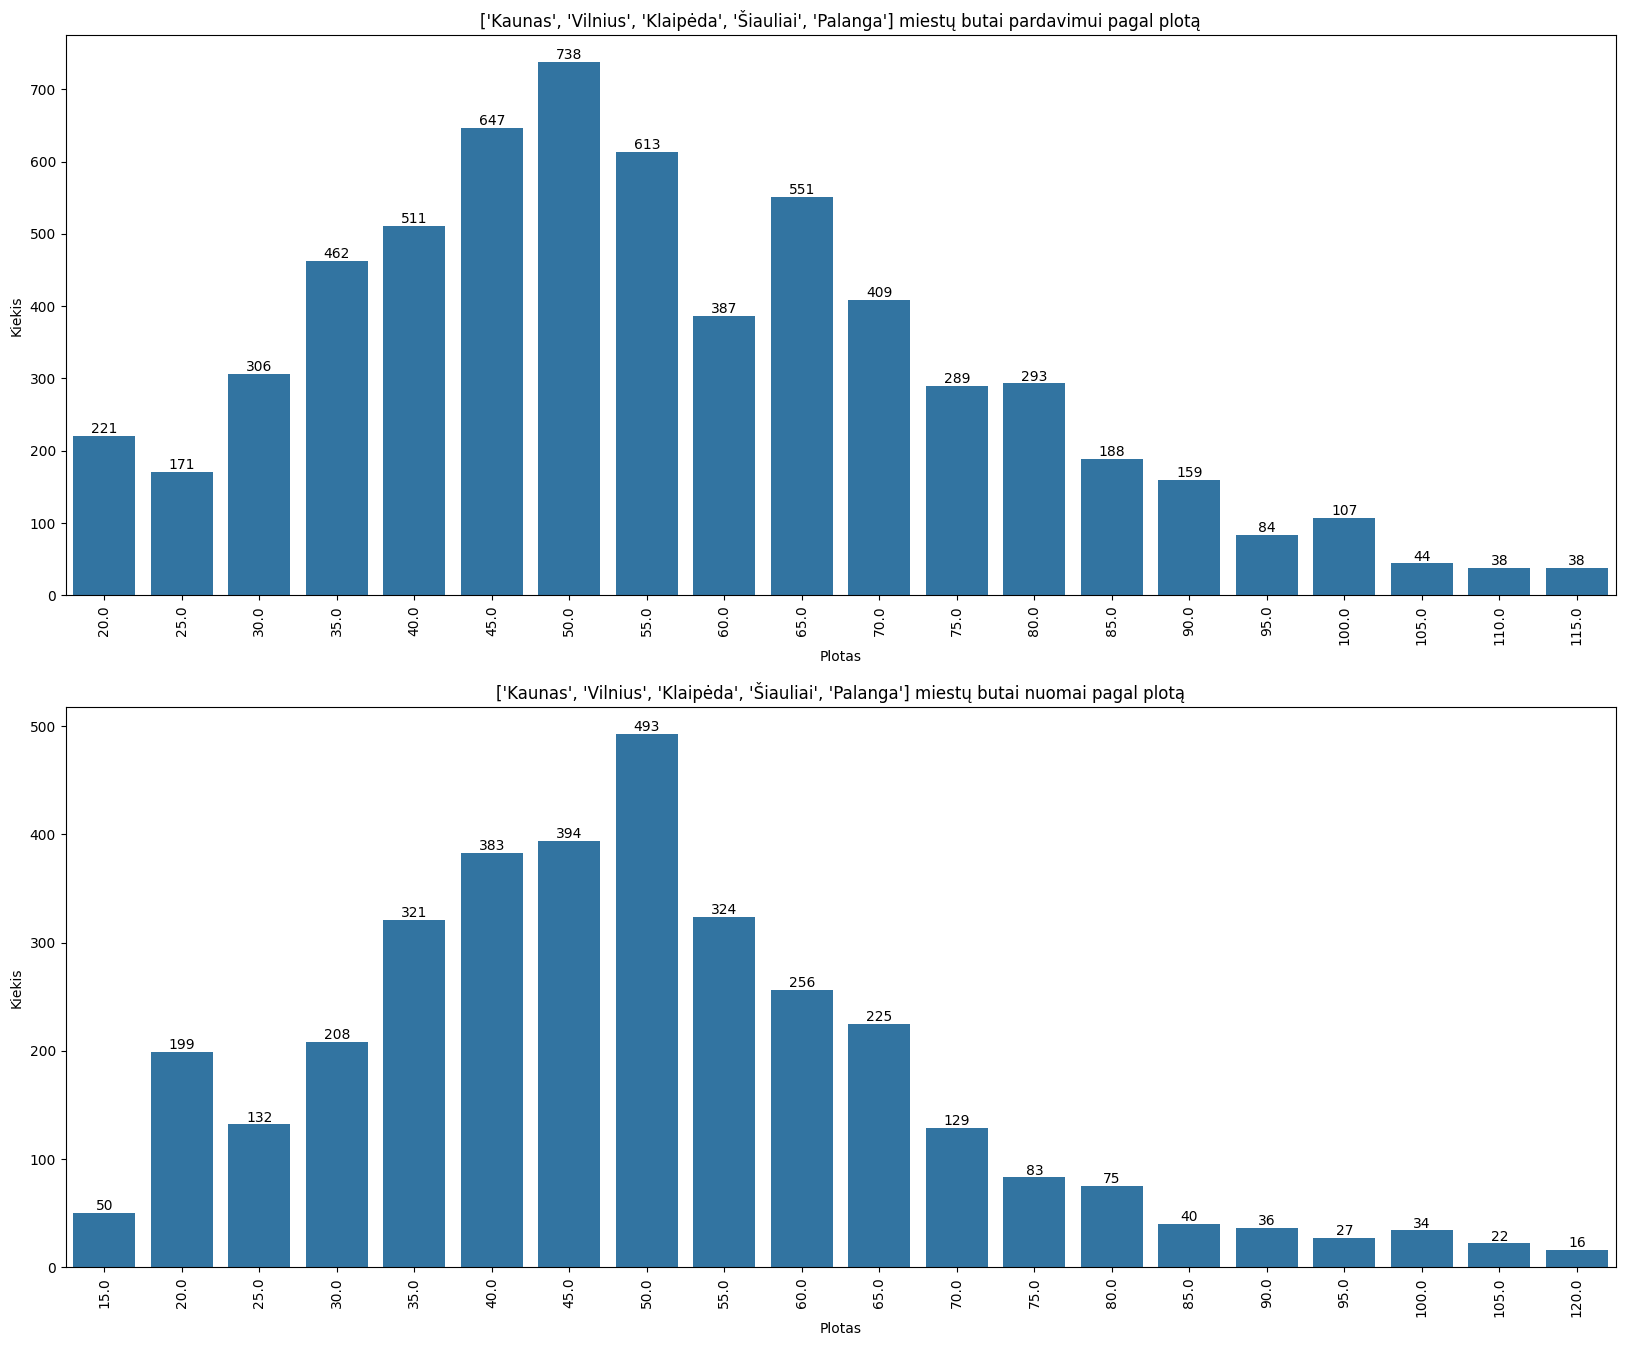

In [123]:
fig, axes = plt.subplots(2,1,figsize=(20,16))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui'].groupby(['Plotas_group'])['Kaina'].count().reset_index().sort_values(by= 'Kaina', ascending=False)[:20]
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai'].groupby(['Plotas_group'])['Kaina'].count().reset_index().sort_values(by= 'Kaina', ascending=False)[:20]
axes[0].set_title(f'{miestai} miestų butai pardavimui pagal plotą')
axes[1].set_title(f'{miestai} miestų butai nuomai pagal plotą')
ax = sns.barplot(data=dfx,x = 'Plotas_group', y='Kaina', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Plotas_group', y='Kaina', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Plotas',ylabel='Kiekis')
axes[1].set(xlabel='Plotas',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

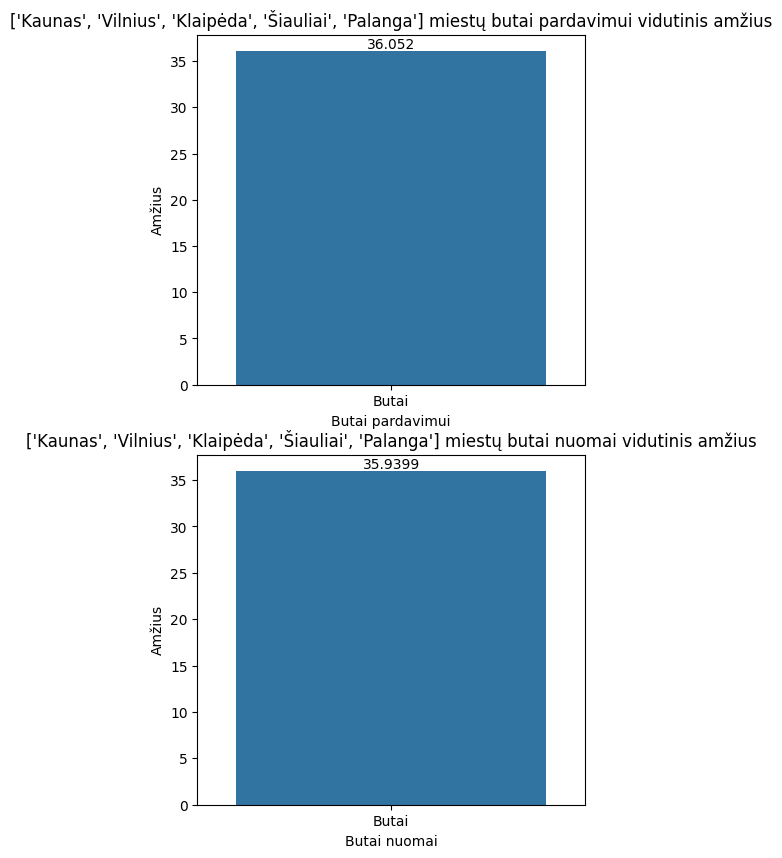

In [15]:
fig, axes = plt.subplots(2,1,figsize=(5,10))
dfx = list(df_anal[df_anal['Tipas'] == 'Butai pardavimui']['Amžius'])
dfy = list(df_anal[df_anal['Tipas'] == 'Butai nuomai']['Amžius'])
x_avg = []
y_avg = []
x_avg.append(sum(dfx)/len(dfx))
y_avg.append(sum(dfy)/len(dfy))
ndf = pd.DataFrame()
ndf['Pav'] = pd.DataFrame(data=['Butai'])
ndf['AVG'] = pd.DataFrame(data=x_avg)
ndf['AVG_n'] = pd.DataFrame(data=y_avg)
axes[0].set_title(f'{miestai} miestų butai pardavimui vidutinis amžius')
axes[1].set_title(f'{miestai} miestų butai nuomai vidutinis amžius')
ax = sns.barplot(data=ndf, x='Pav', y='AVG', ax=axes[0])
ay = sns.barplot(data=ndf, x='Pav', y='AVG_n', ax=axes[1])
axes[0].set(xlabel='Butai pardavimui',ylabel='Amžius')
axes[1].set(xlabel='Butai nuomai',ylabel='Amžius')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

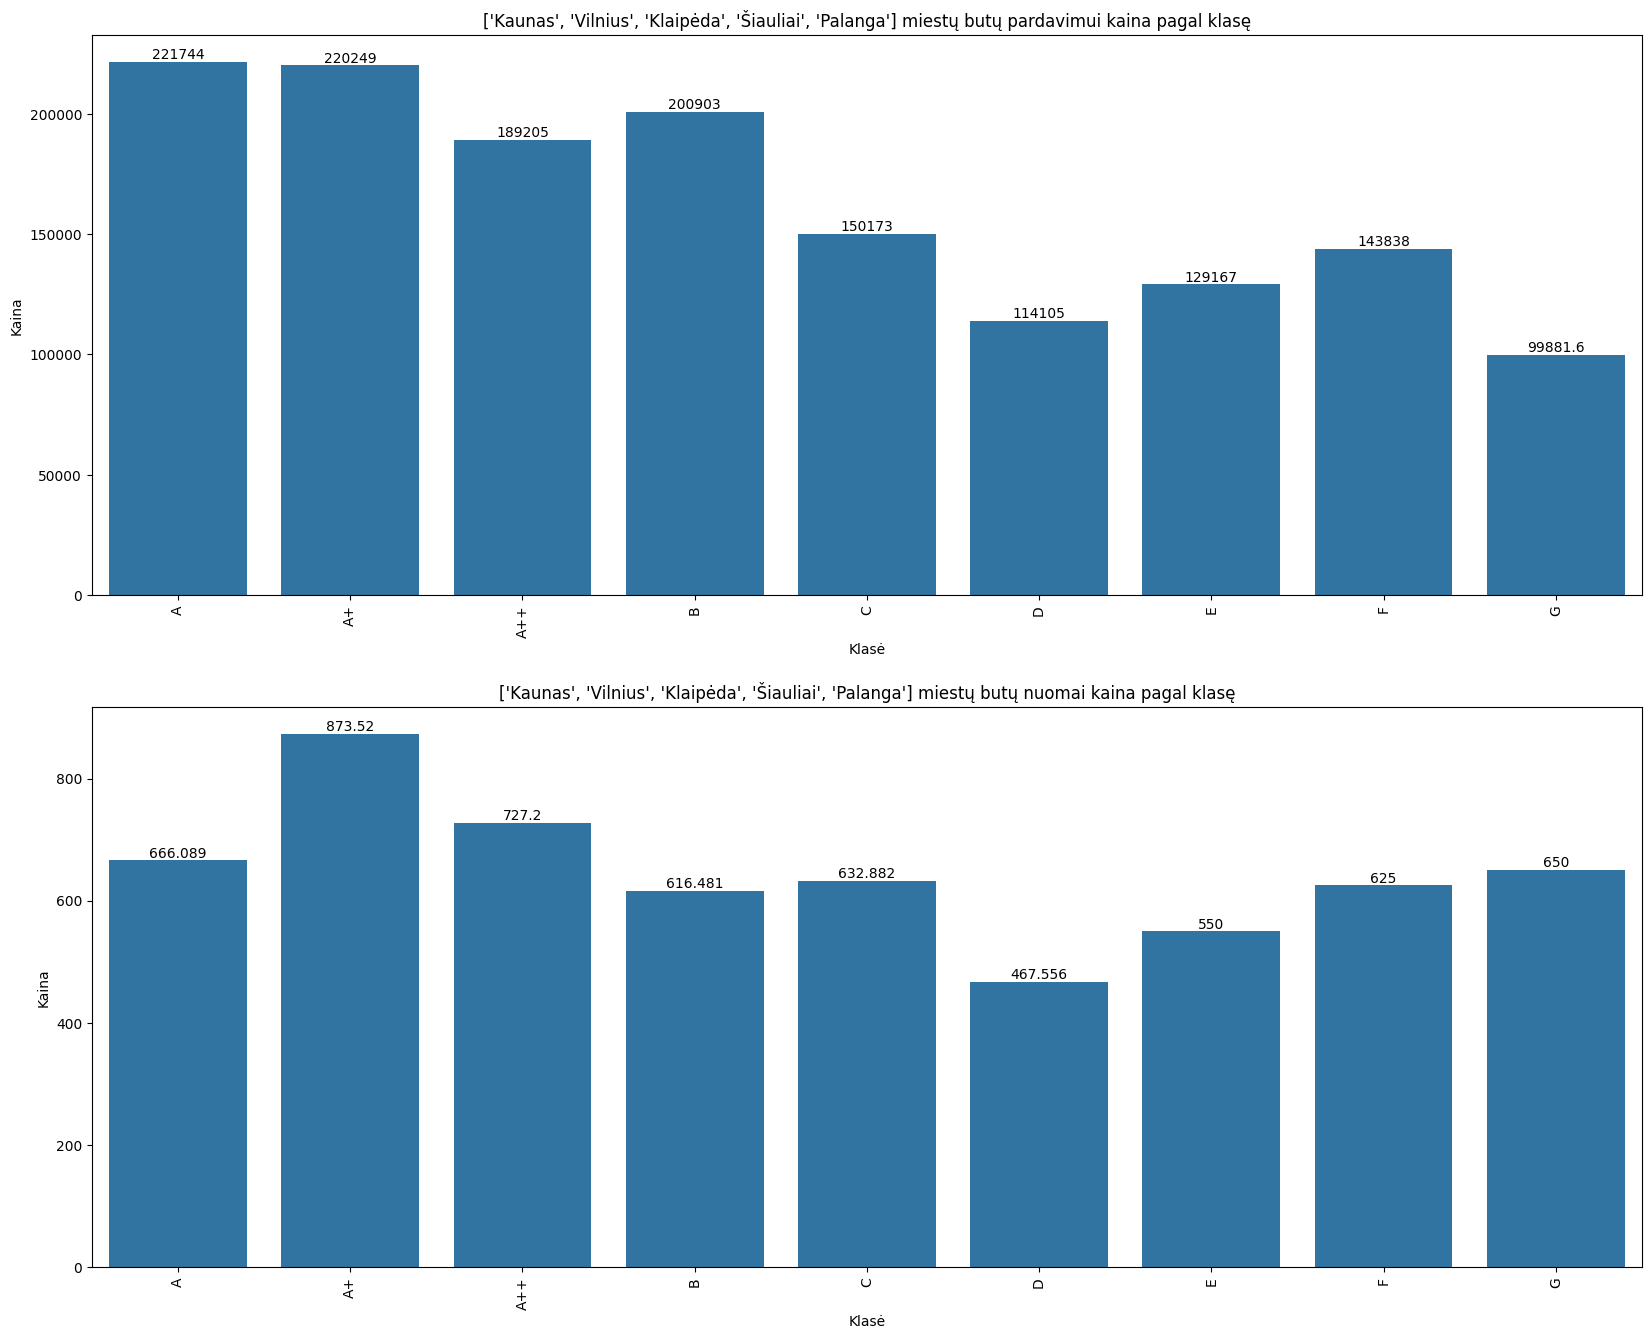

In [17]:
fig, axes = plt.subplots(2,1,figsize=(20,16))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui'].groupby(['Pastato energijos suvartojimo klasė'])['Kaina_n'].mean().reset_index()
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai'].groupby(['Pastato energijos suvartojimo klasė'])['Kaina_n'].mean().reset_index()
axes[0].set_title(f'{miestai} miestų butų pardavimui kaina pagal klasę')
axes[1].set_title(f'{miestai} miestų butų nuomai kaina pagal klasę')
ax = sns.barplot(data=dfx,x = 'Pastato energijos suvartojimo klasė', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Pastato energijos suvartojimo klasė', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Klasė',ylabel='Kaina')
axes[1].set(xlabel='Klasė',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

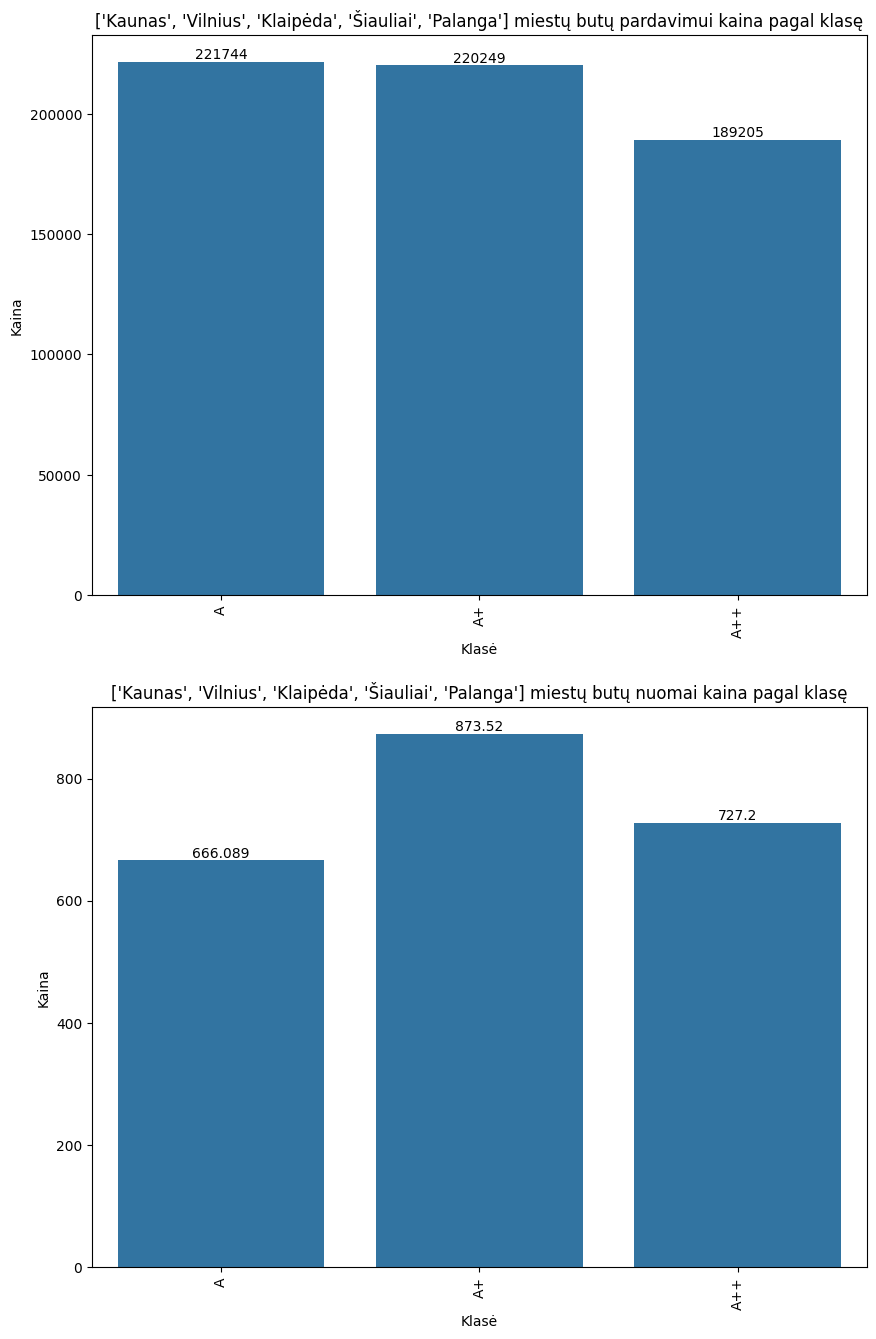

In [18]:
fig, axes = plt.subplots(2,1,figsize=(10,16))
dfx = df_class[df_class['Tipas'] == 'Butai pardavimui'].groupby(['Pastato energijos suvartojimo klasė'])['Kaina_n'].mean().reset_index()
dfy = df_class[df_class['Tipas'] == 'Butai nuomai'].groupby(['Pastato energijos suvartojimo klasė'])['Kaina_n'].mean().reset_index()
axes[0].set_title(f'{miestai} miestų butų pardavimui kaina pagal klasę')
axes[1].set_title(f'{miestai} miestų butų nuomai kaina pagal klasę')
ax = sns.barplot(data=dfx,x = 'Pastato energijos suvartojimo klasė', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Pastato energijos suvartojimo klasė', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Klasė',ylabel='Kaina')
axes[1].set(xlabel='Klasė',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

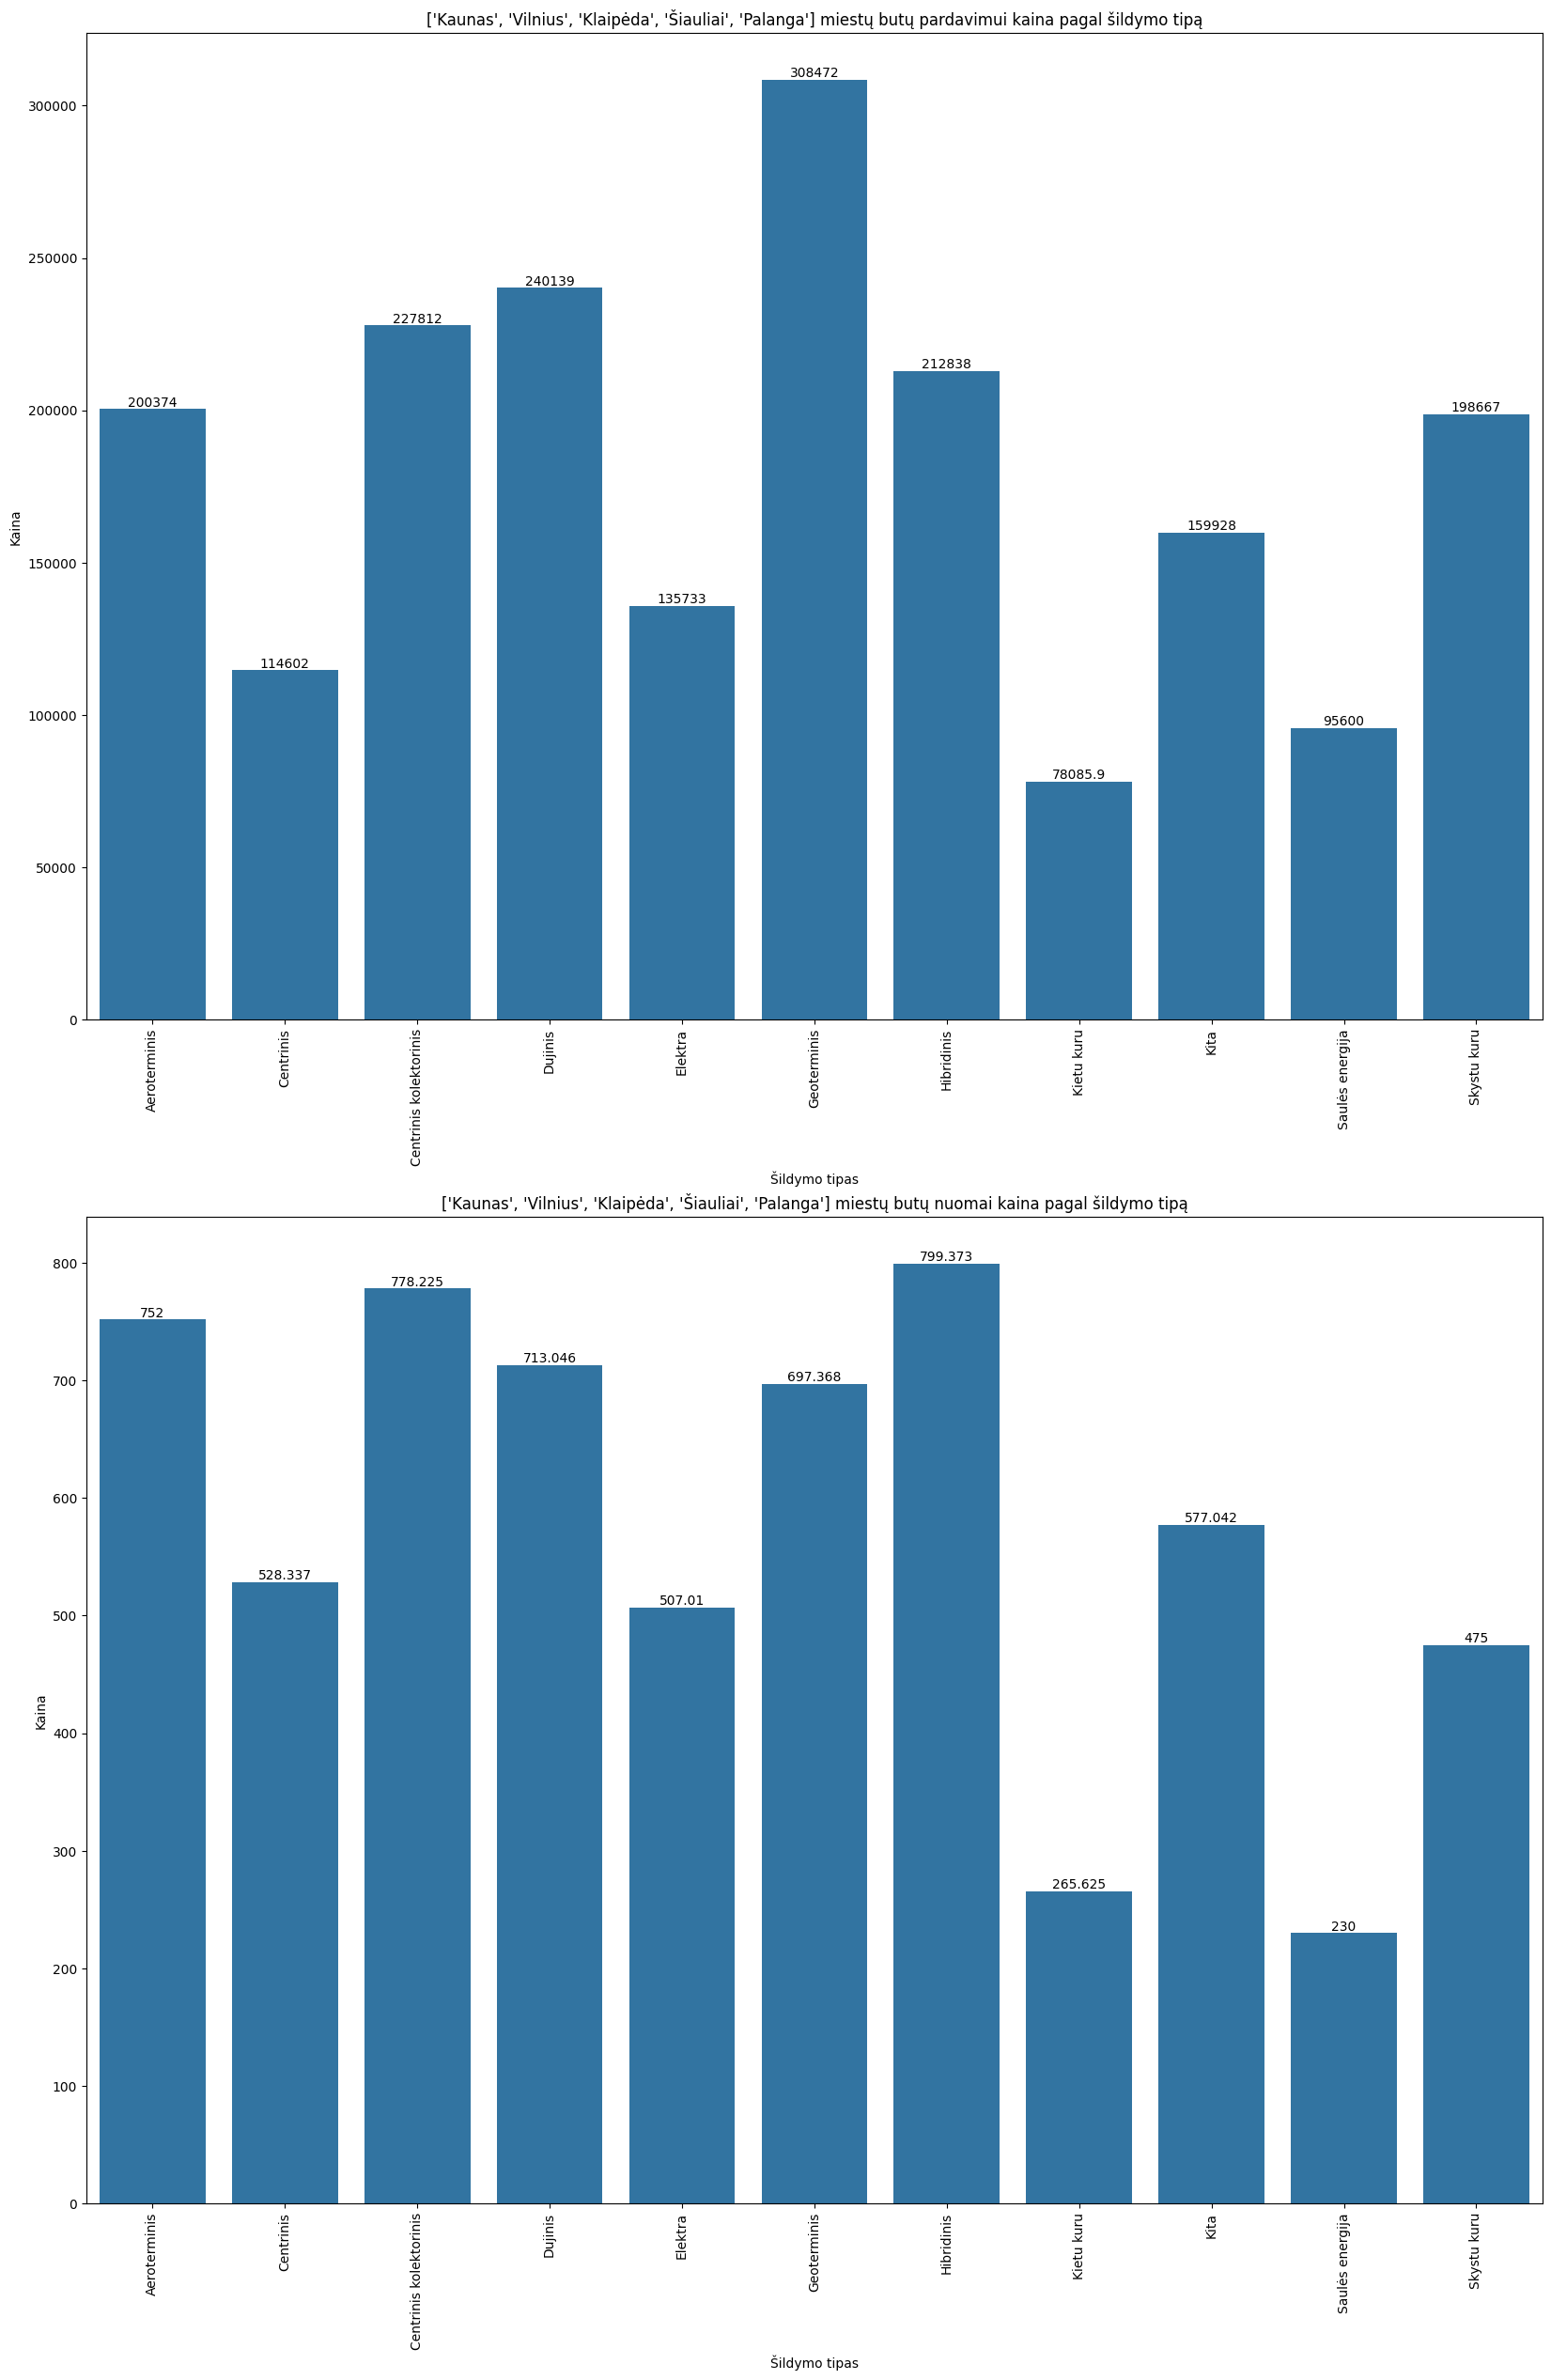

In [19]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui'].groupby(['Šildymo_tipas'])['Kaina_n'].mean().reset_index()
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai'].groupby(['Šildymo_tipas'])['Kaina_n'].mean().reset_index()
axes[0].set_title(f'{miestai} miestų butų pardavimui kaina pagal šildymo tipą')
axes[1].set_title(f'{miestai} miestų butų nuomai kaina pagal šildymo tipą')
ax = sns.barplot(data=dfx,x = 'Šildymo_tipas', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Šildymo_tipas', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Šildymo tipas',ylabel='Kaina')
axes[1].set(xlabel='Šildymo tipas',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

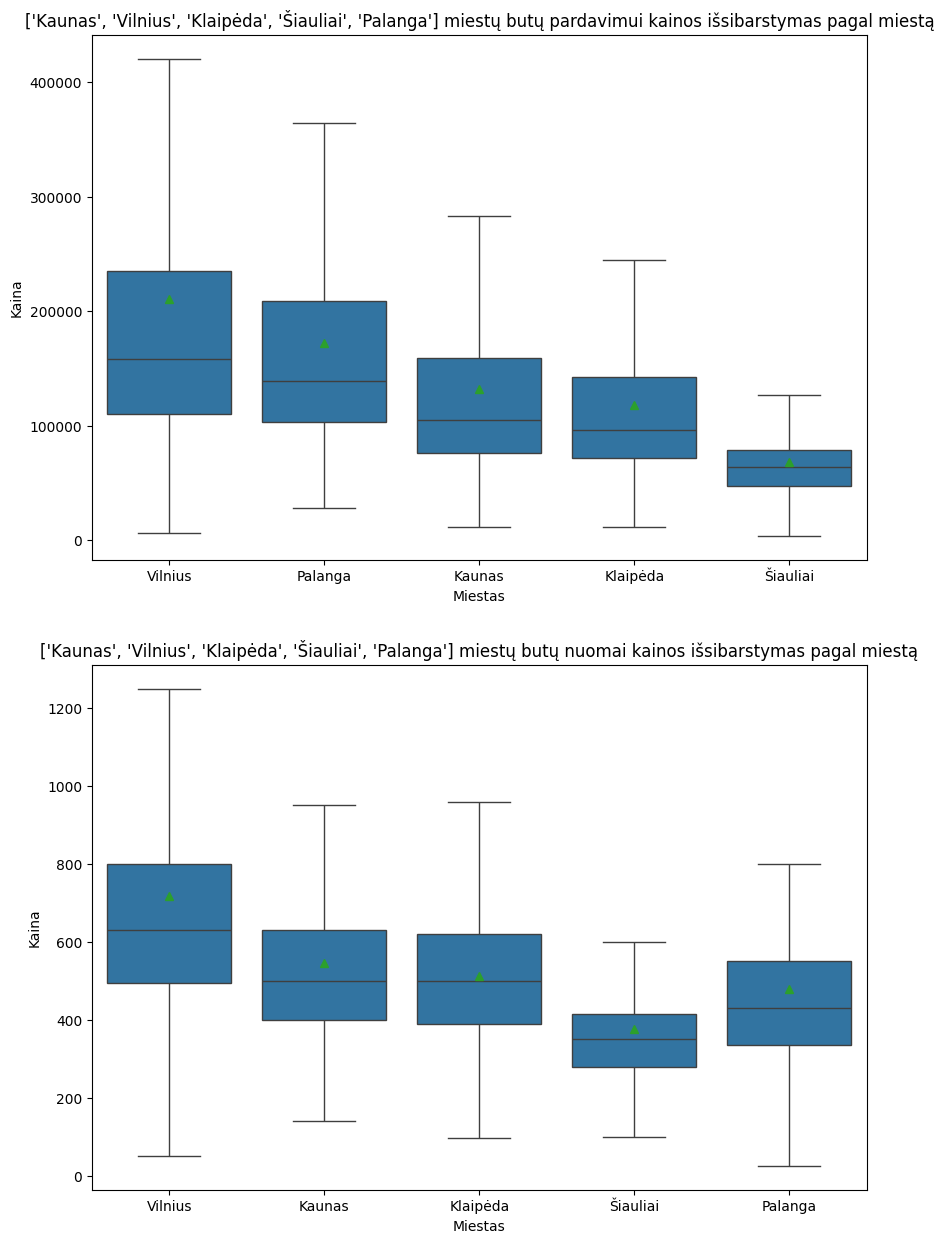

In [20]:
fig, axes = plt.subplots(2,1,figsize=(10,15))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui']
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai']
axes[0].set_title(f'{miestai} miestų butų pardavimui kainos išsibarstymas pagal miestą')
axes[1].set_title(f'{miestai} miestų butų nuomai kainos išsibarstymas pagal miestą')
ax = sns.boxplot(data=dfx,x = 'Miestas_n', y='Kaina_n', ax=axes[0], showmeans=True, showfliers=False)
ay = sns.boxplot(data=dfy,x = 'Miestas_n', y='Kaina_n', ax=axes[1], showmeans=True, showfliers=False)
axes[0].set(xlabel='Miestas',ylabel='Kaina')
axes[1].set(xlabel='Miestas',ylabel='Kaina')
plt.show()

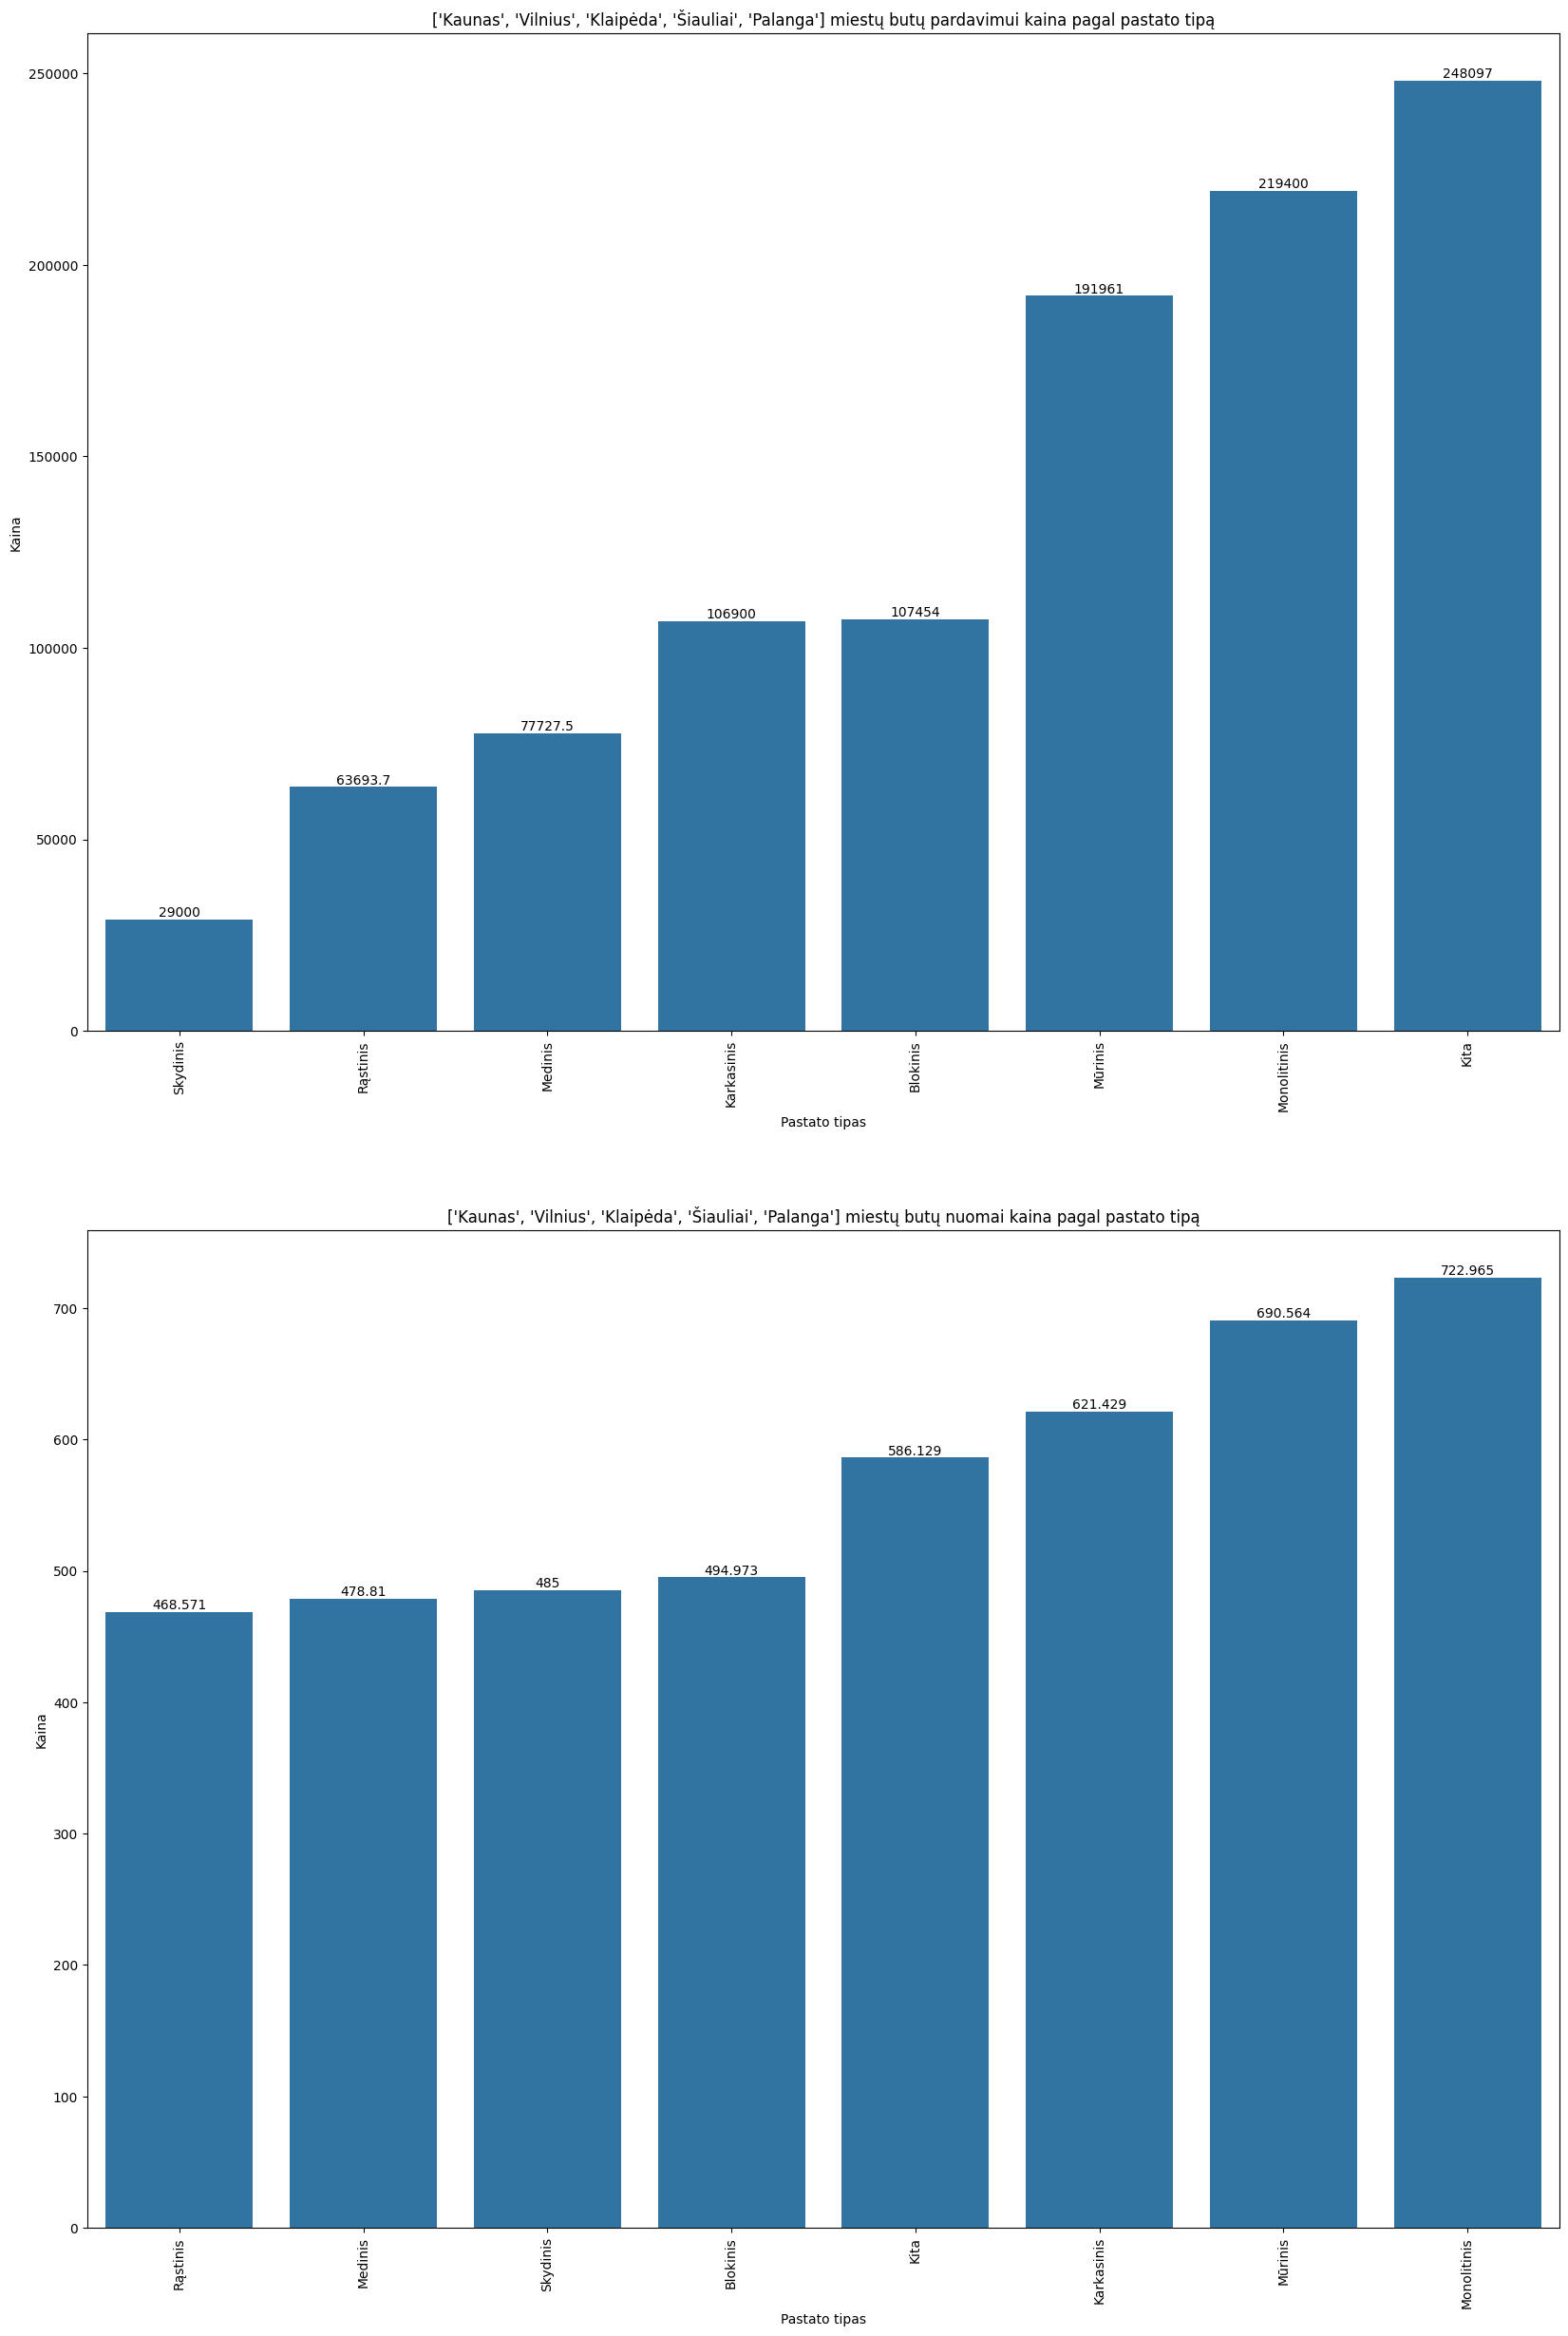

In [21]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui'].groupby(['Pastato tipas'])['Kaina_n'].mean().reset_index().sort_values(by='Kaina_n')
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai'].groupby(['Pastato tipas'])['Kaina_n'].mean().reset_index().sort_values(by='Kaina_n')
axes[0].set_title(f'{miestai} miestų butų pardavimui kaina pagal pastato tipą')
axes[1].set_title(f'{miestai} miestų butų nuomai kaina pagal pastato tipą')
ax = sns.barplot(data=dfx,x = 'Pastato tipas', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Pastato tipas', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Pastato tipas',ylabel='Kaina')
axes[1].set(xlabel='Pastato tipas',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

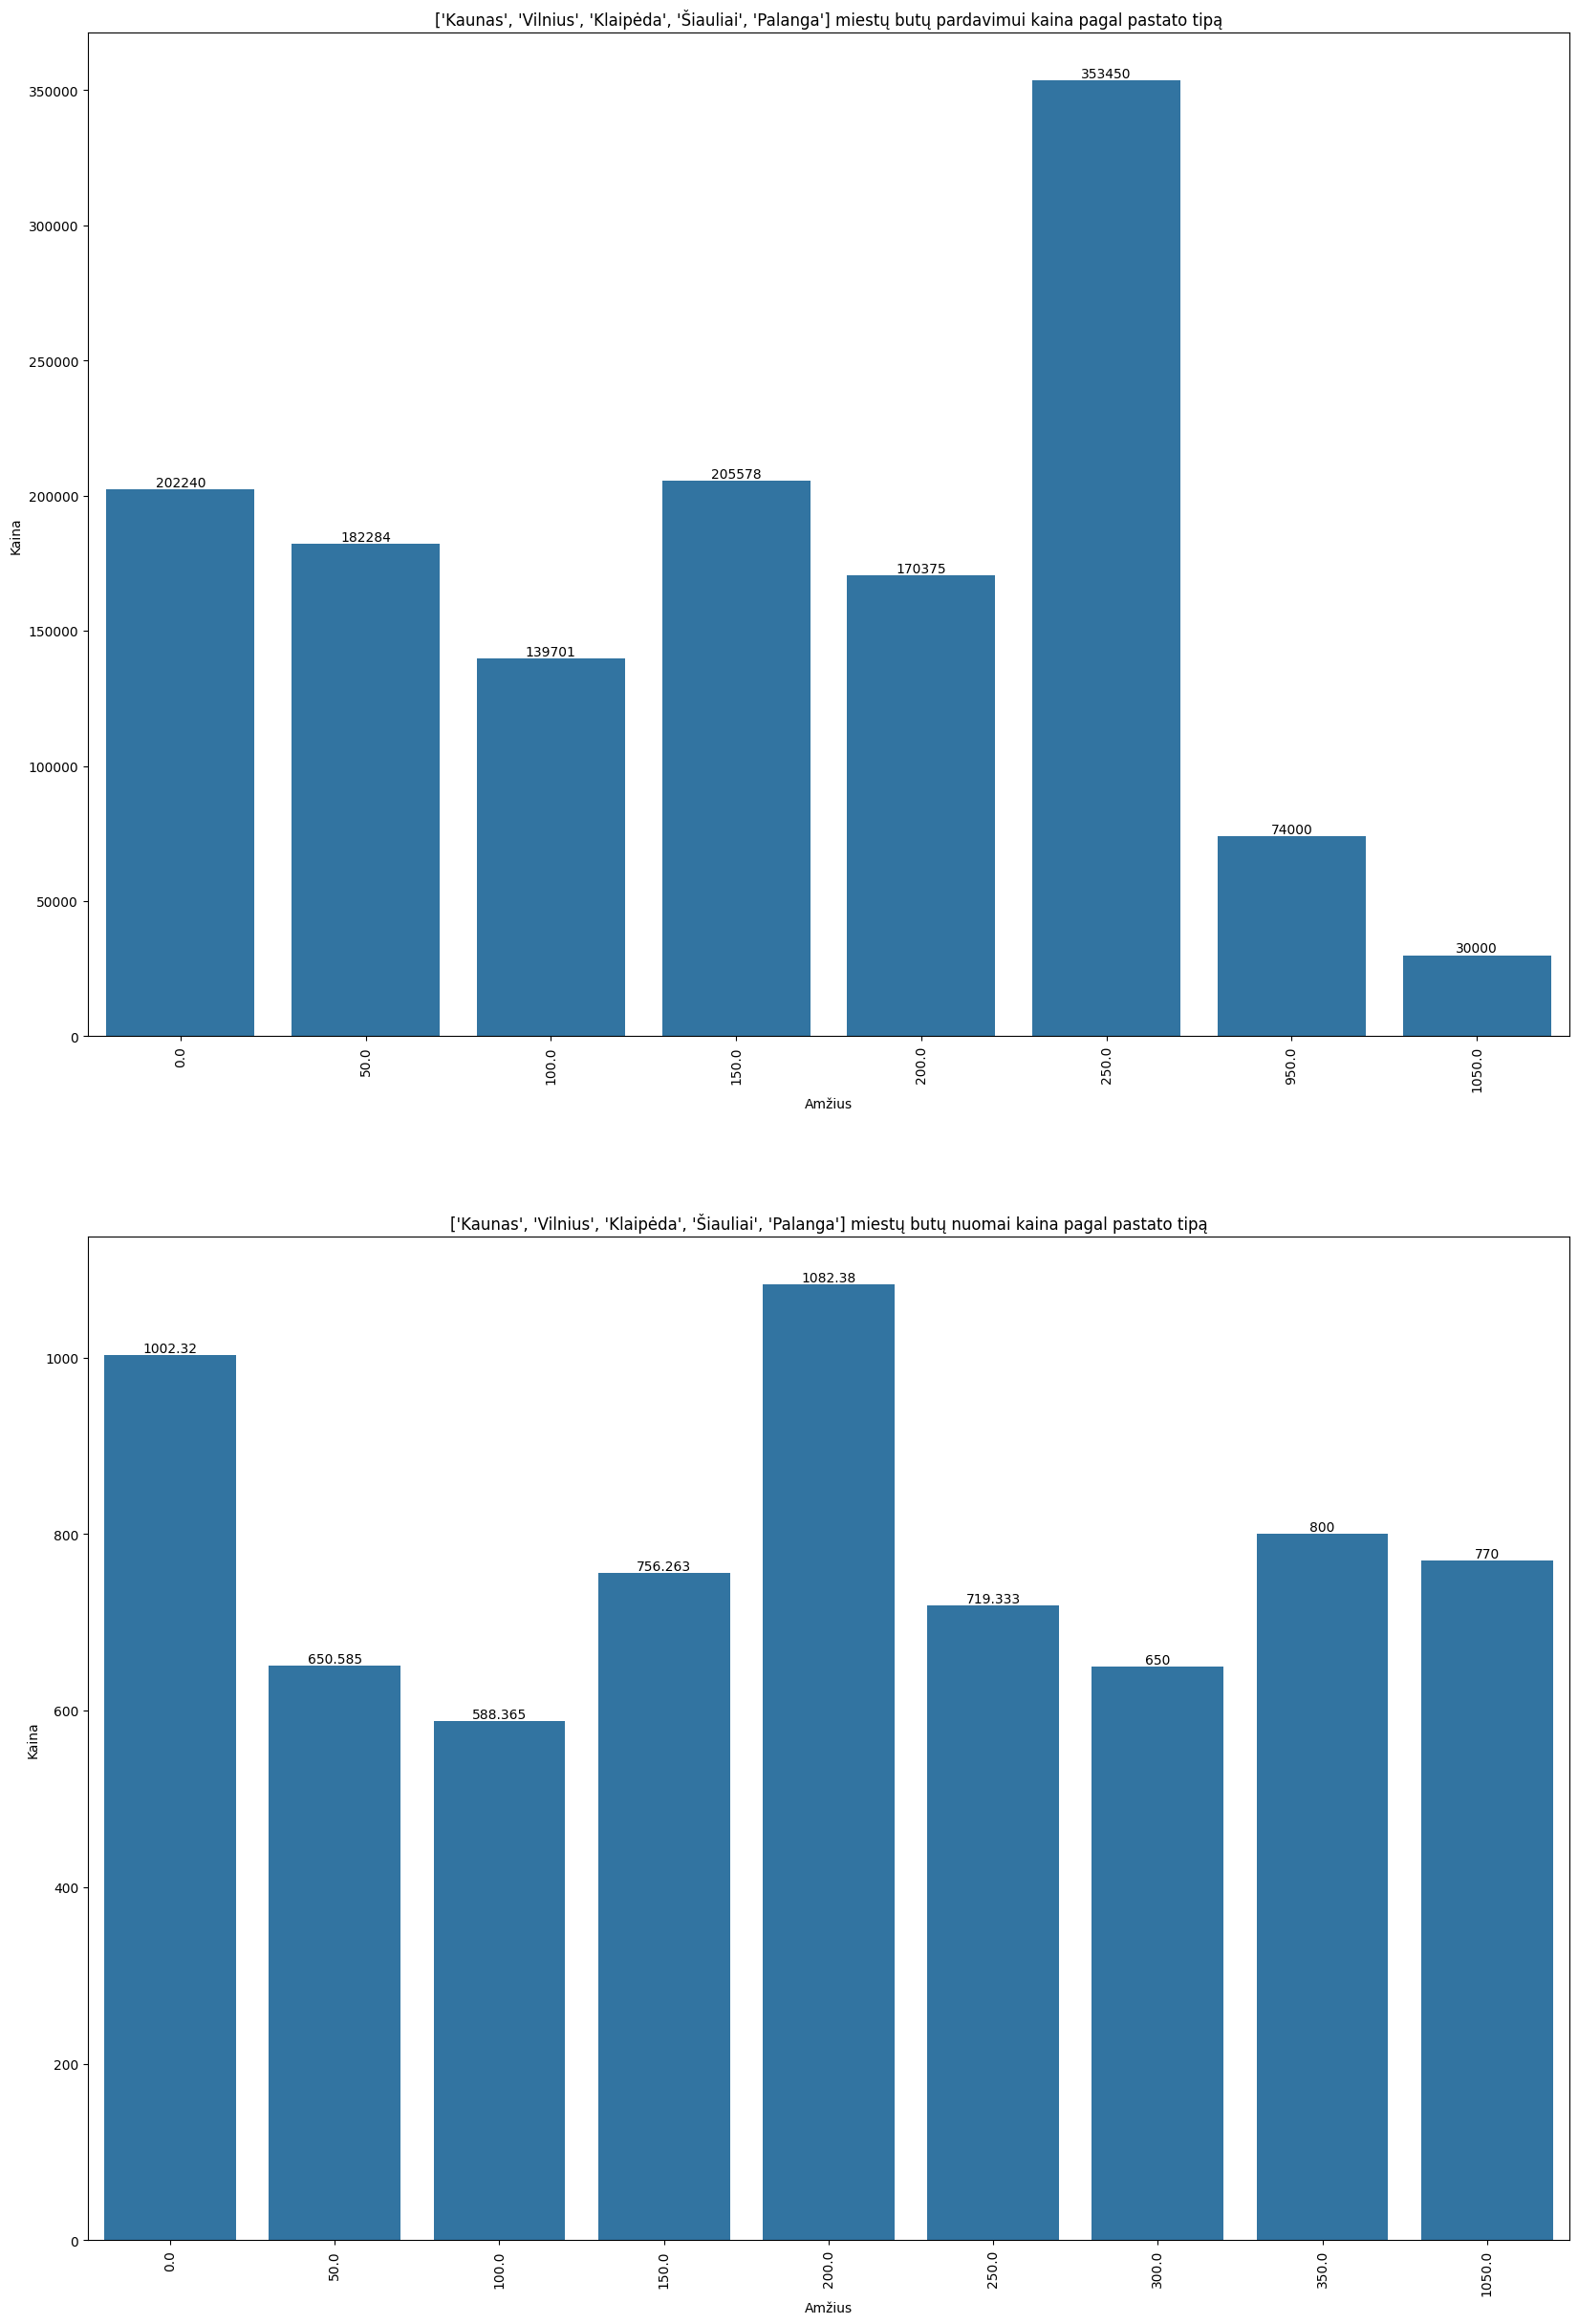

In [22]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui'].groupby(['Amžius_group'])['Kaina_n'].mean().reset_index()
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai'].groupby(['Amžius_group'])['Kaina_n'].mean().reset_index()
axes[0].set_title(f'{miestai} miestų butų pardavimui kaina pagal pastato tipą')
axes[1].set_title(f'{miestai} miestų butų nuomai kaina pagal pastato tipą')
ax = sns.barplot(data=dfx,x = 'Amžius_group', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Amžius_group', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Amžius',ylabel='Kaina')
axes[1].set(xlabel='Amžius',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

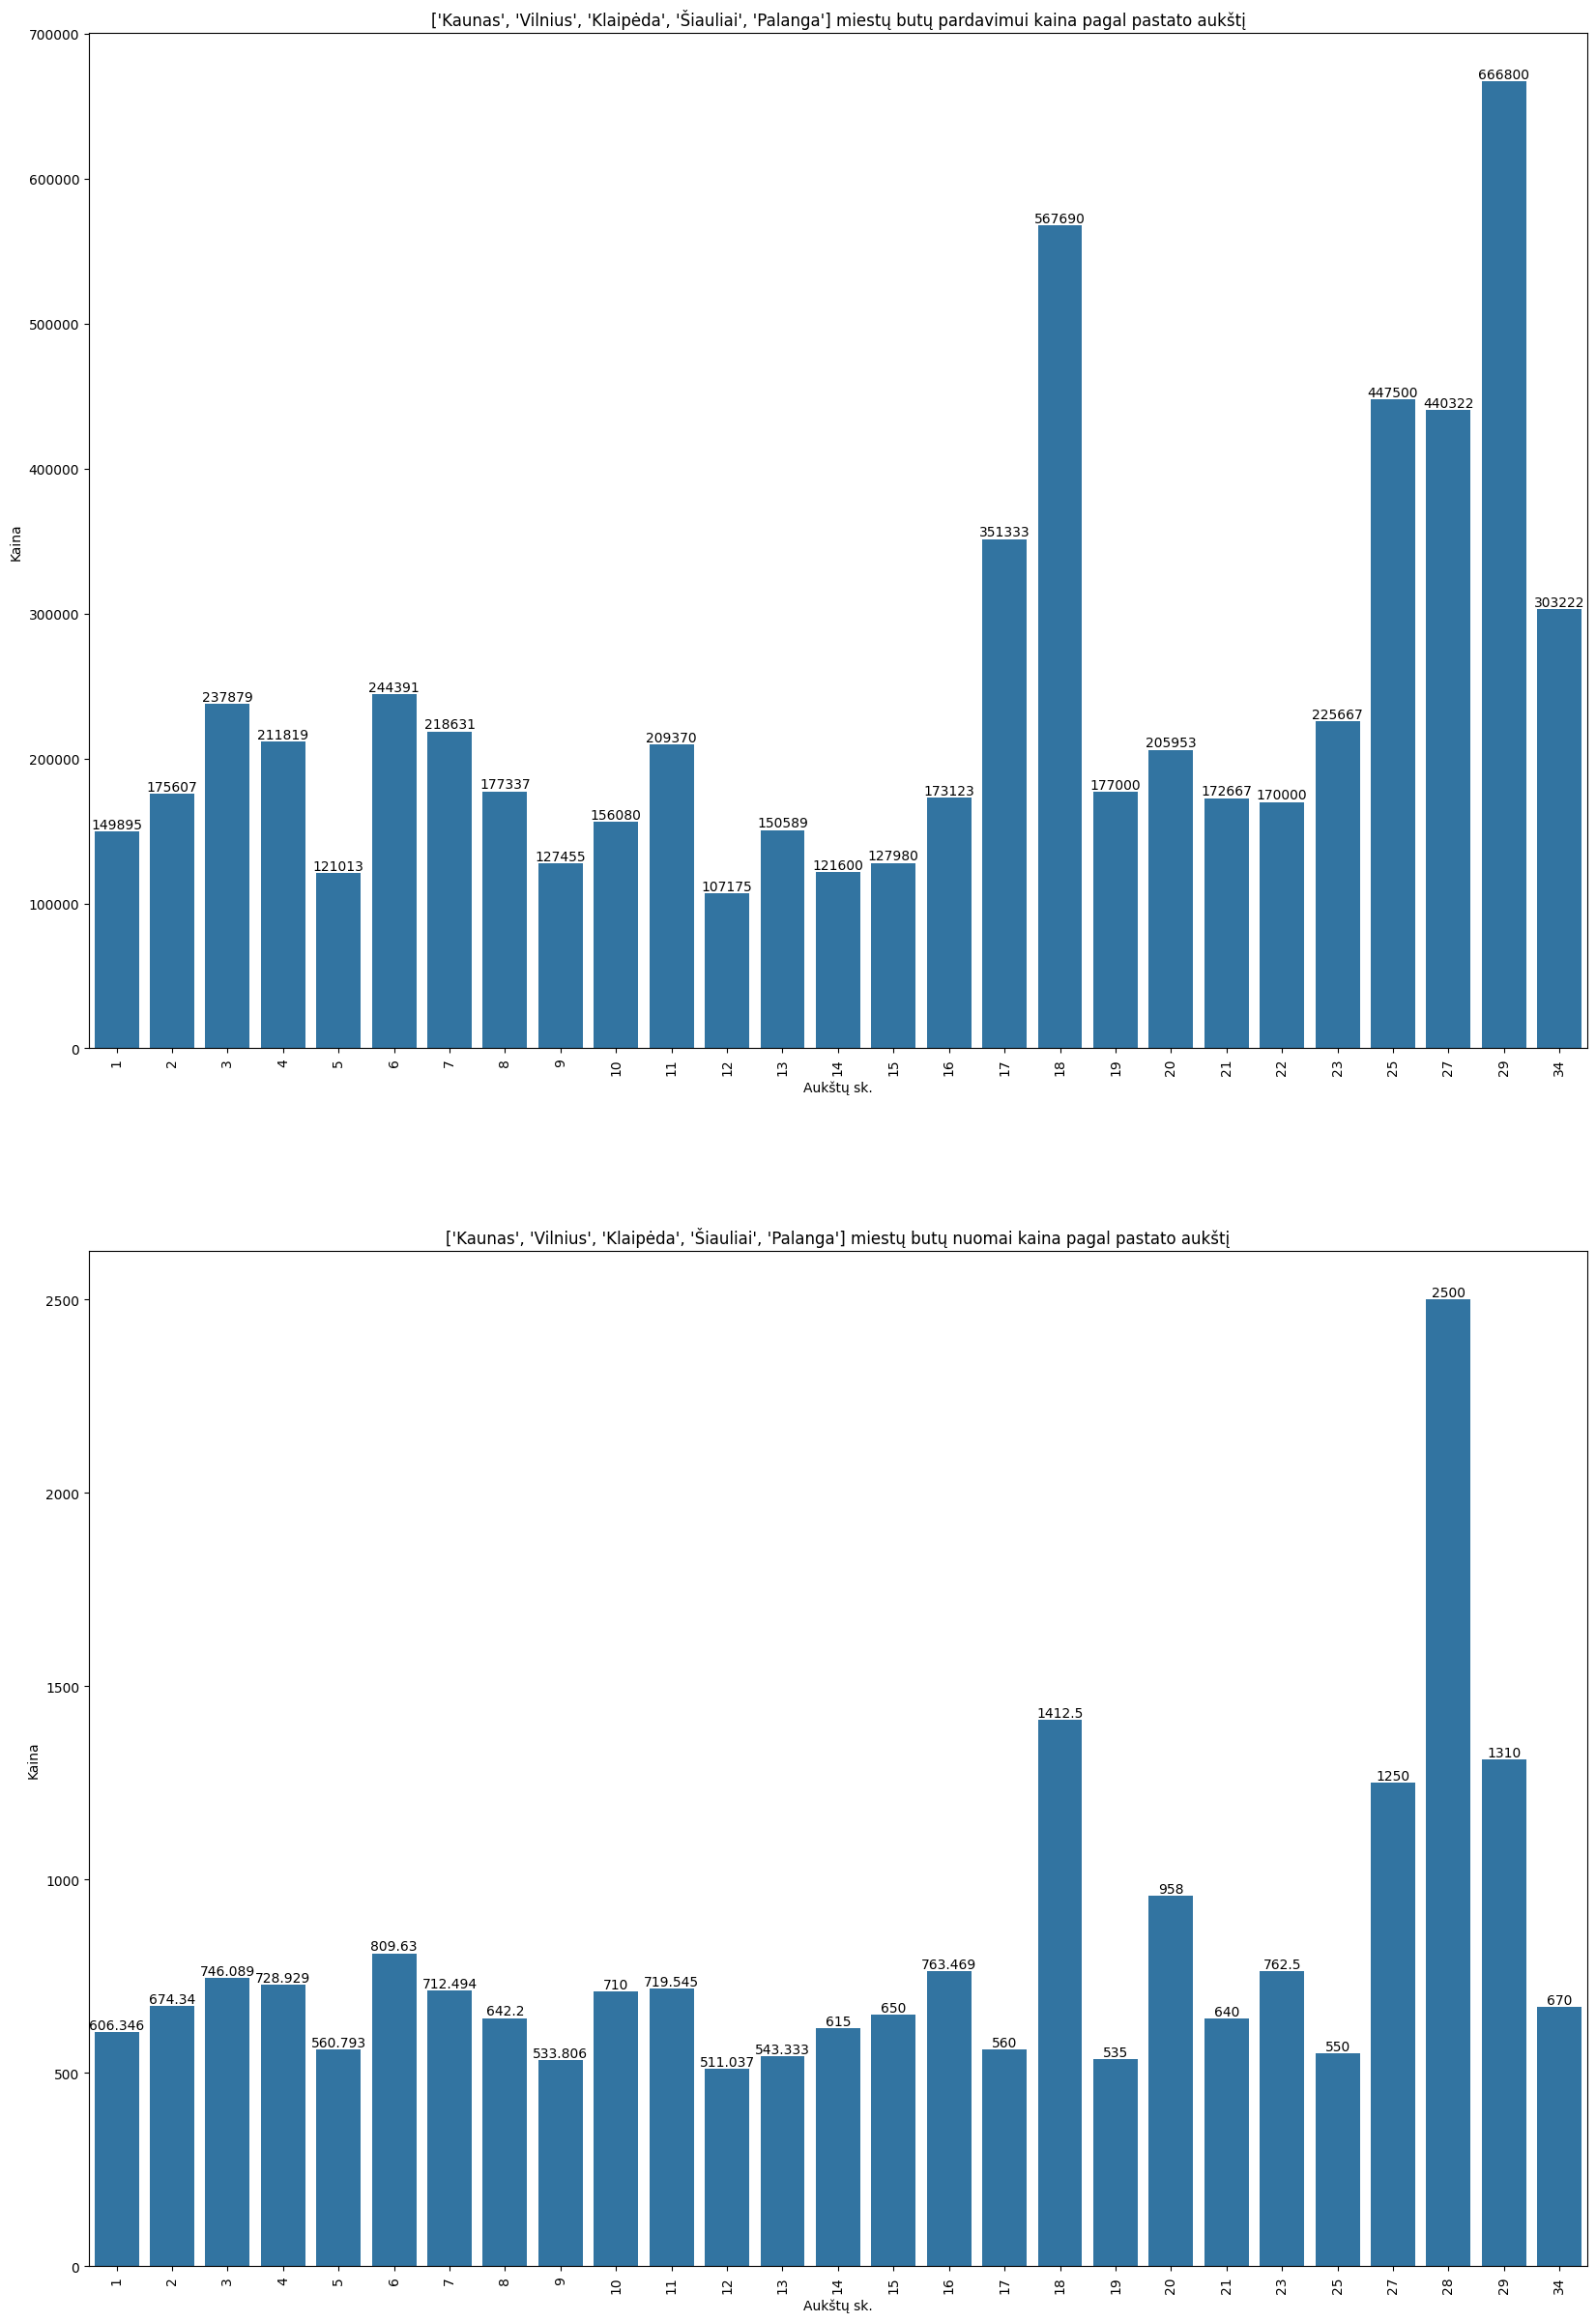

In [23]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui'].groupby(['Aukštų sk.'])['Kaina_n'].mean().reset_index()
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai'].groupby(['Aukštų sk.'])['Kaina_n'].mean().reset_index()
axes[0].set_title(f'{miestai} miestų butų pardavimui kaina pagal pastato aukštį')
axes[1].set_title(f'{miestai} miestų butų nuomai kaina pagal pastato aukštį')
ax = sns.barplot(data=dfx,x = 'Aukštų sk.', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Aukštų sk.', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Aukštų sk.',ylabel='Kaina')
axes[1].set(xlabel='Aukštų sk.',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

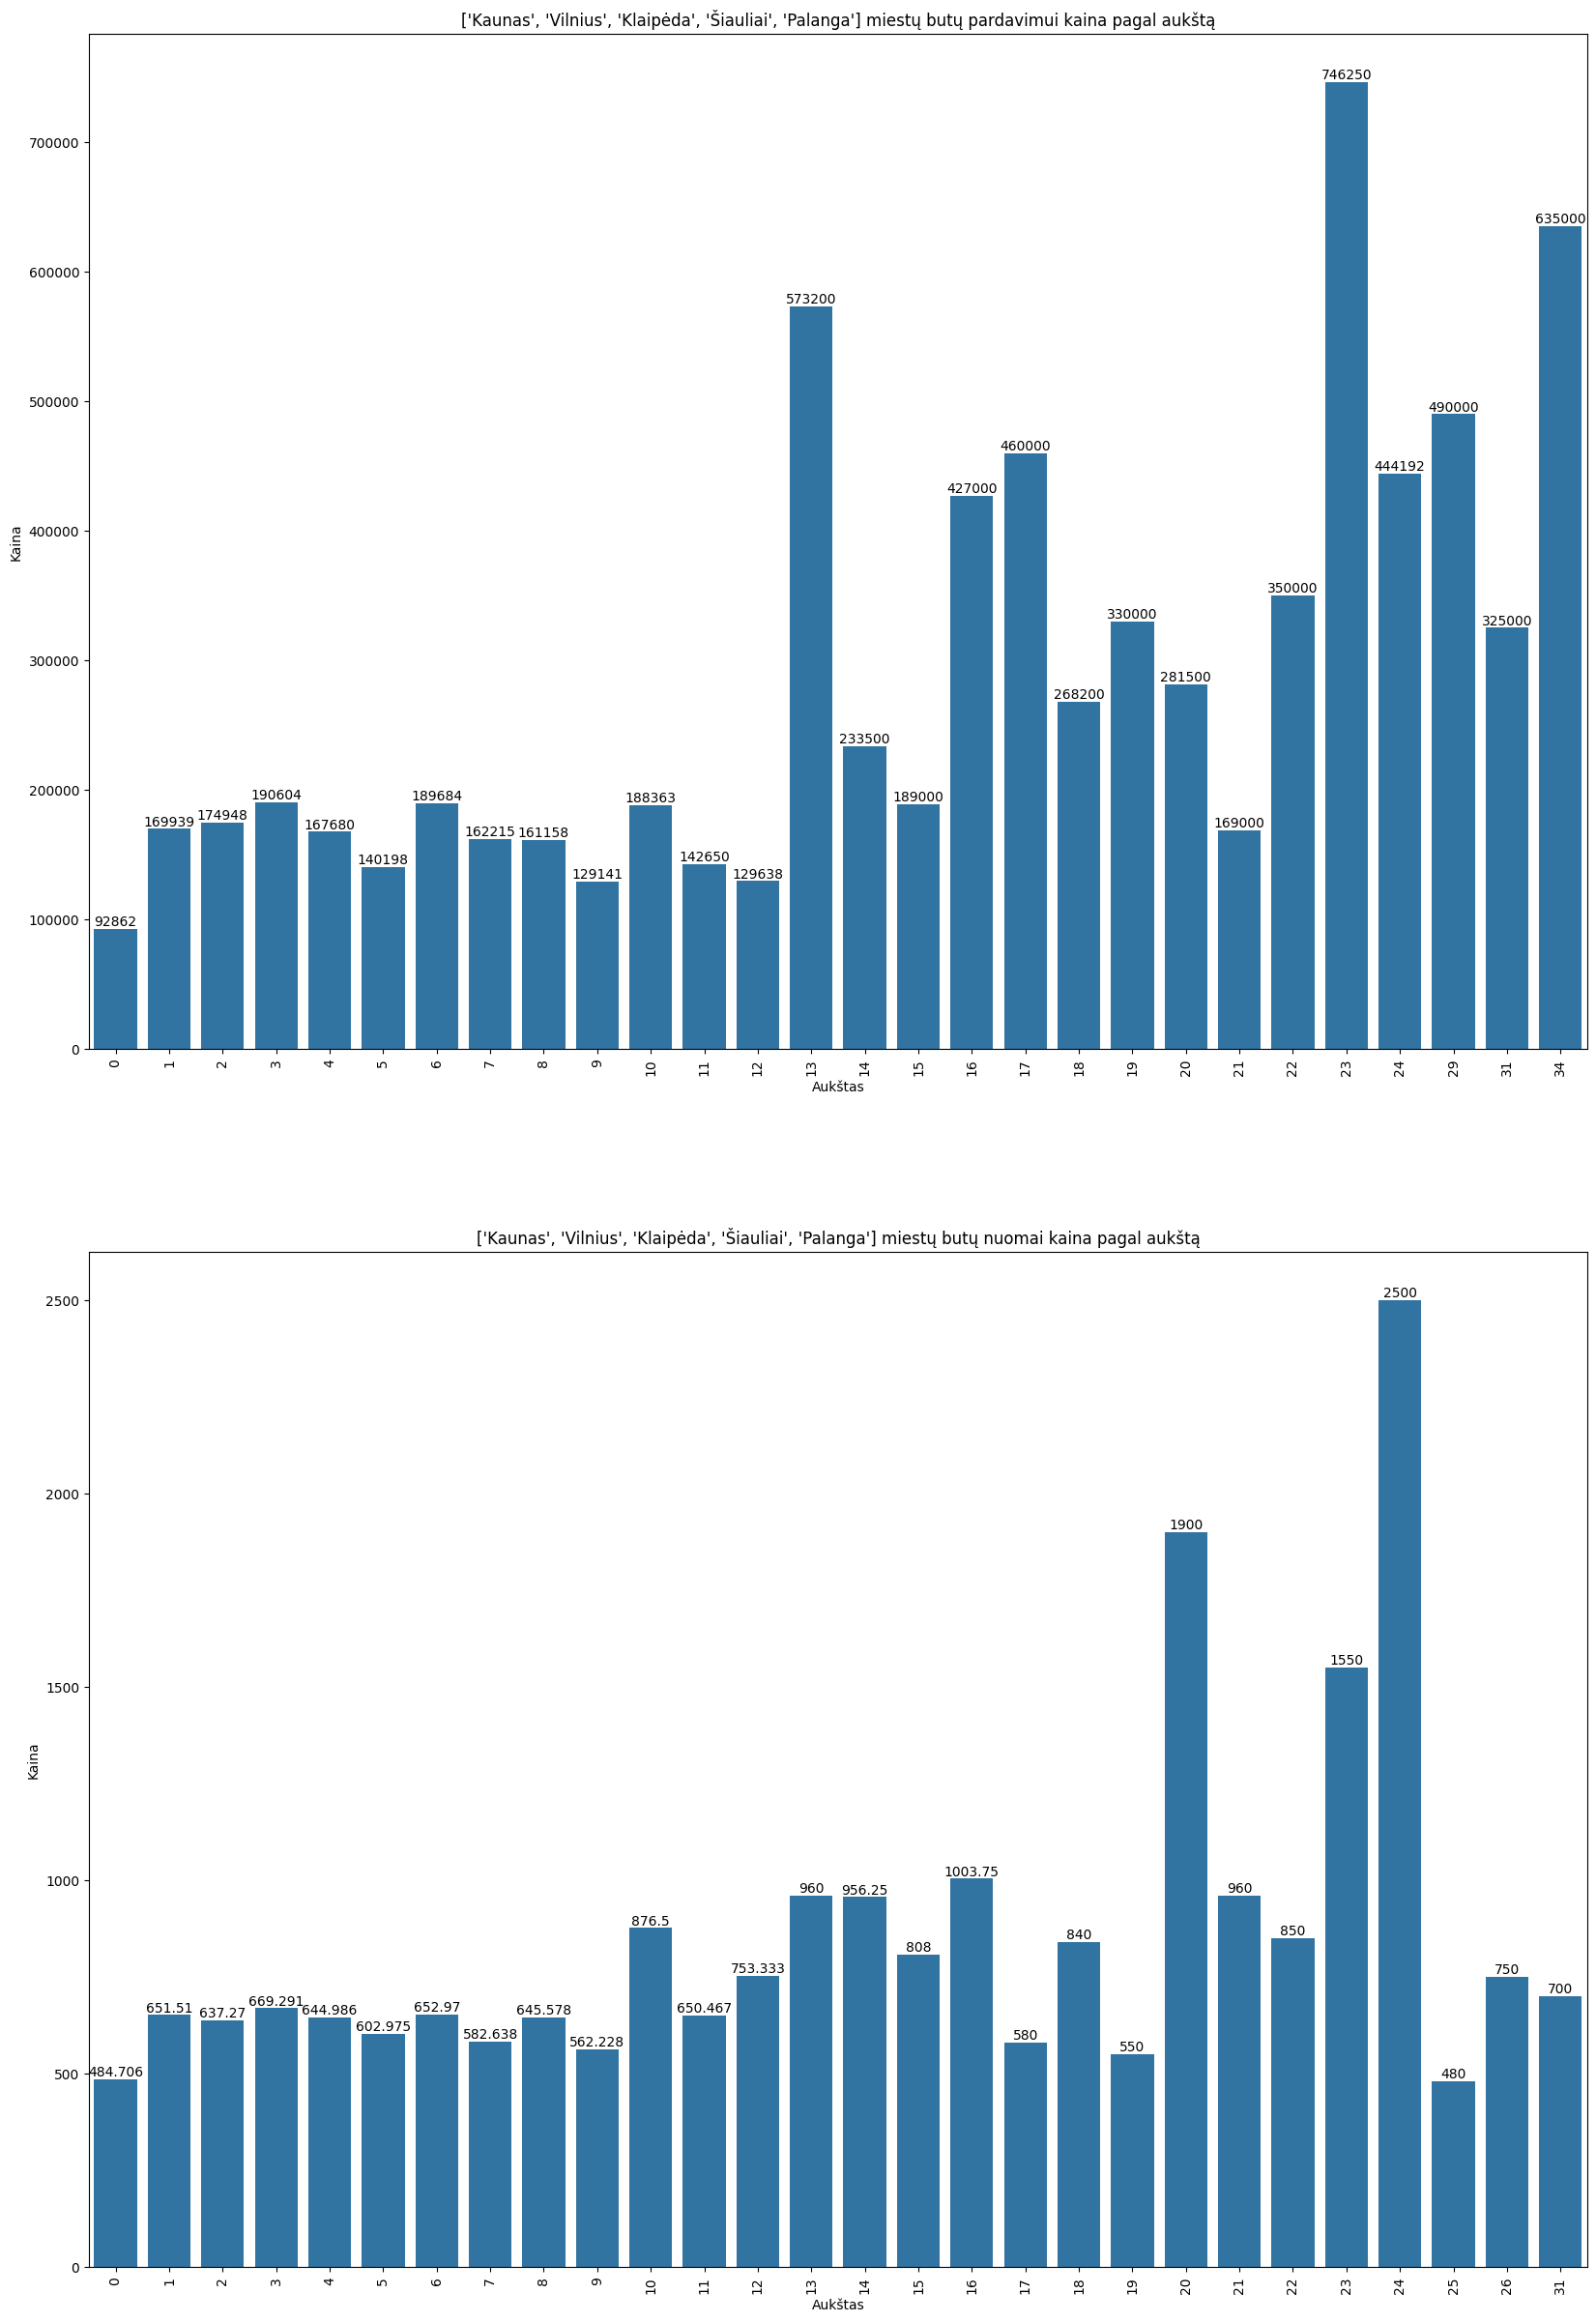

In [24]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_anal[df_anal['Tipas'] == 'Butai pardavimui'].groupby(['Aukštas'])['Kaina_n'].mean().reset_index()
dfy = df_anal[df_anal['Tipas'] == 'Butai nuomai'].groupby(['Aukštas'])['Kaina_n'].mean().reset_index()
axes[0].set_title(f'{miestai} miestų butų pardavimui kaina pagal aukštą')
axes[1].set_title(f'{miestai} miestų butų nuomai kaina pagal aukštą')
ax = sns.barplot(data=dfx,x = 'Aukštas', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Aukštas', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Aukštas',ylabel='Kaina')
axes[1].set(xlabel='Aukštas',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

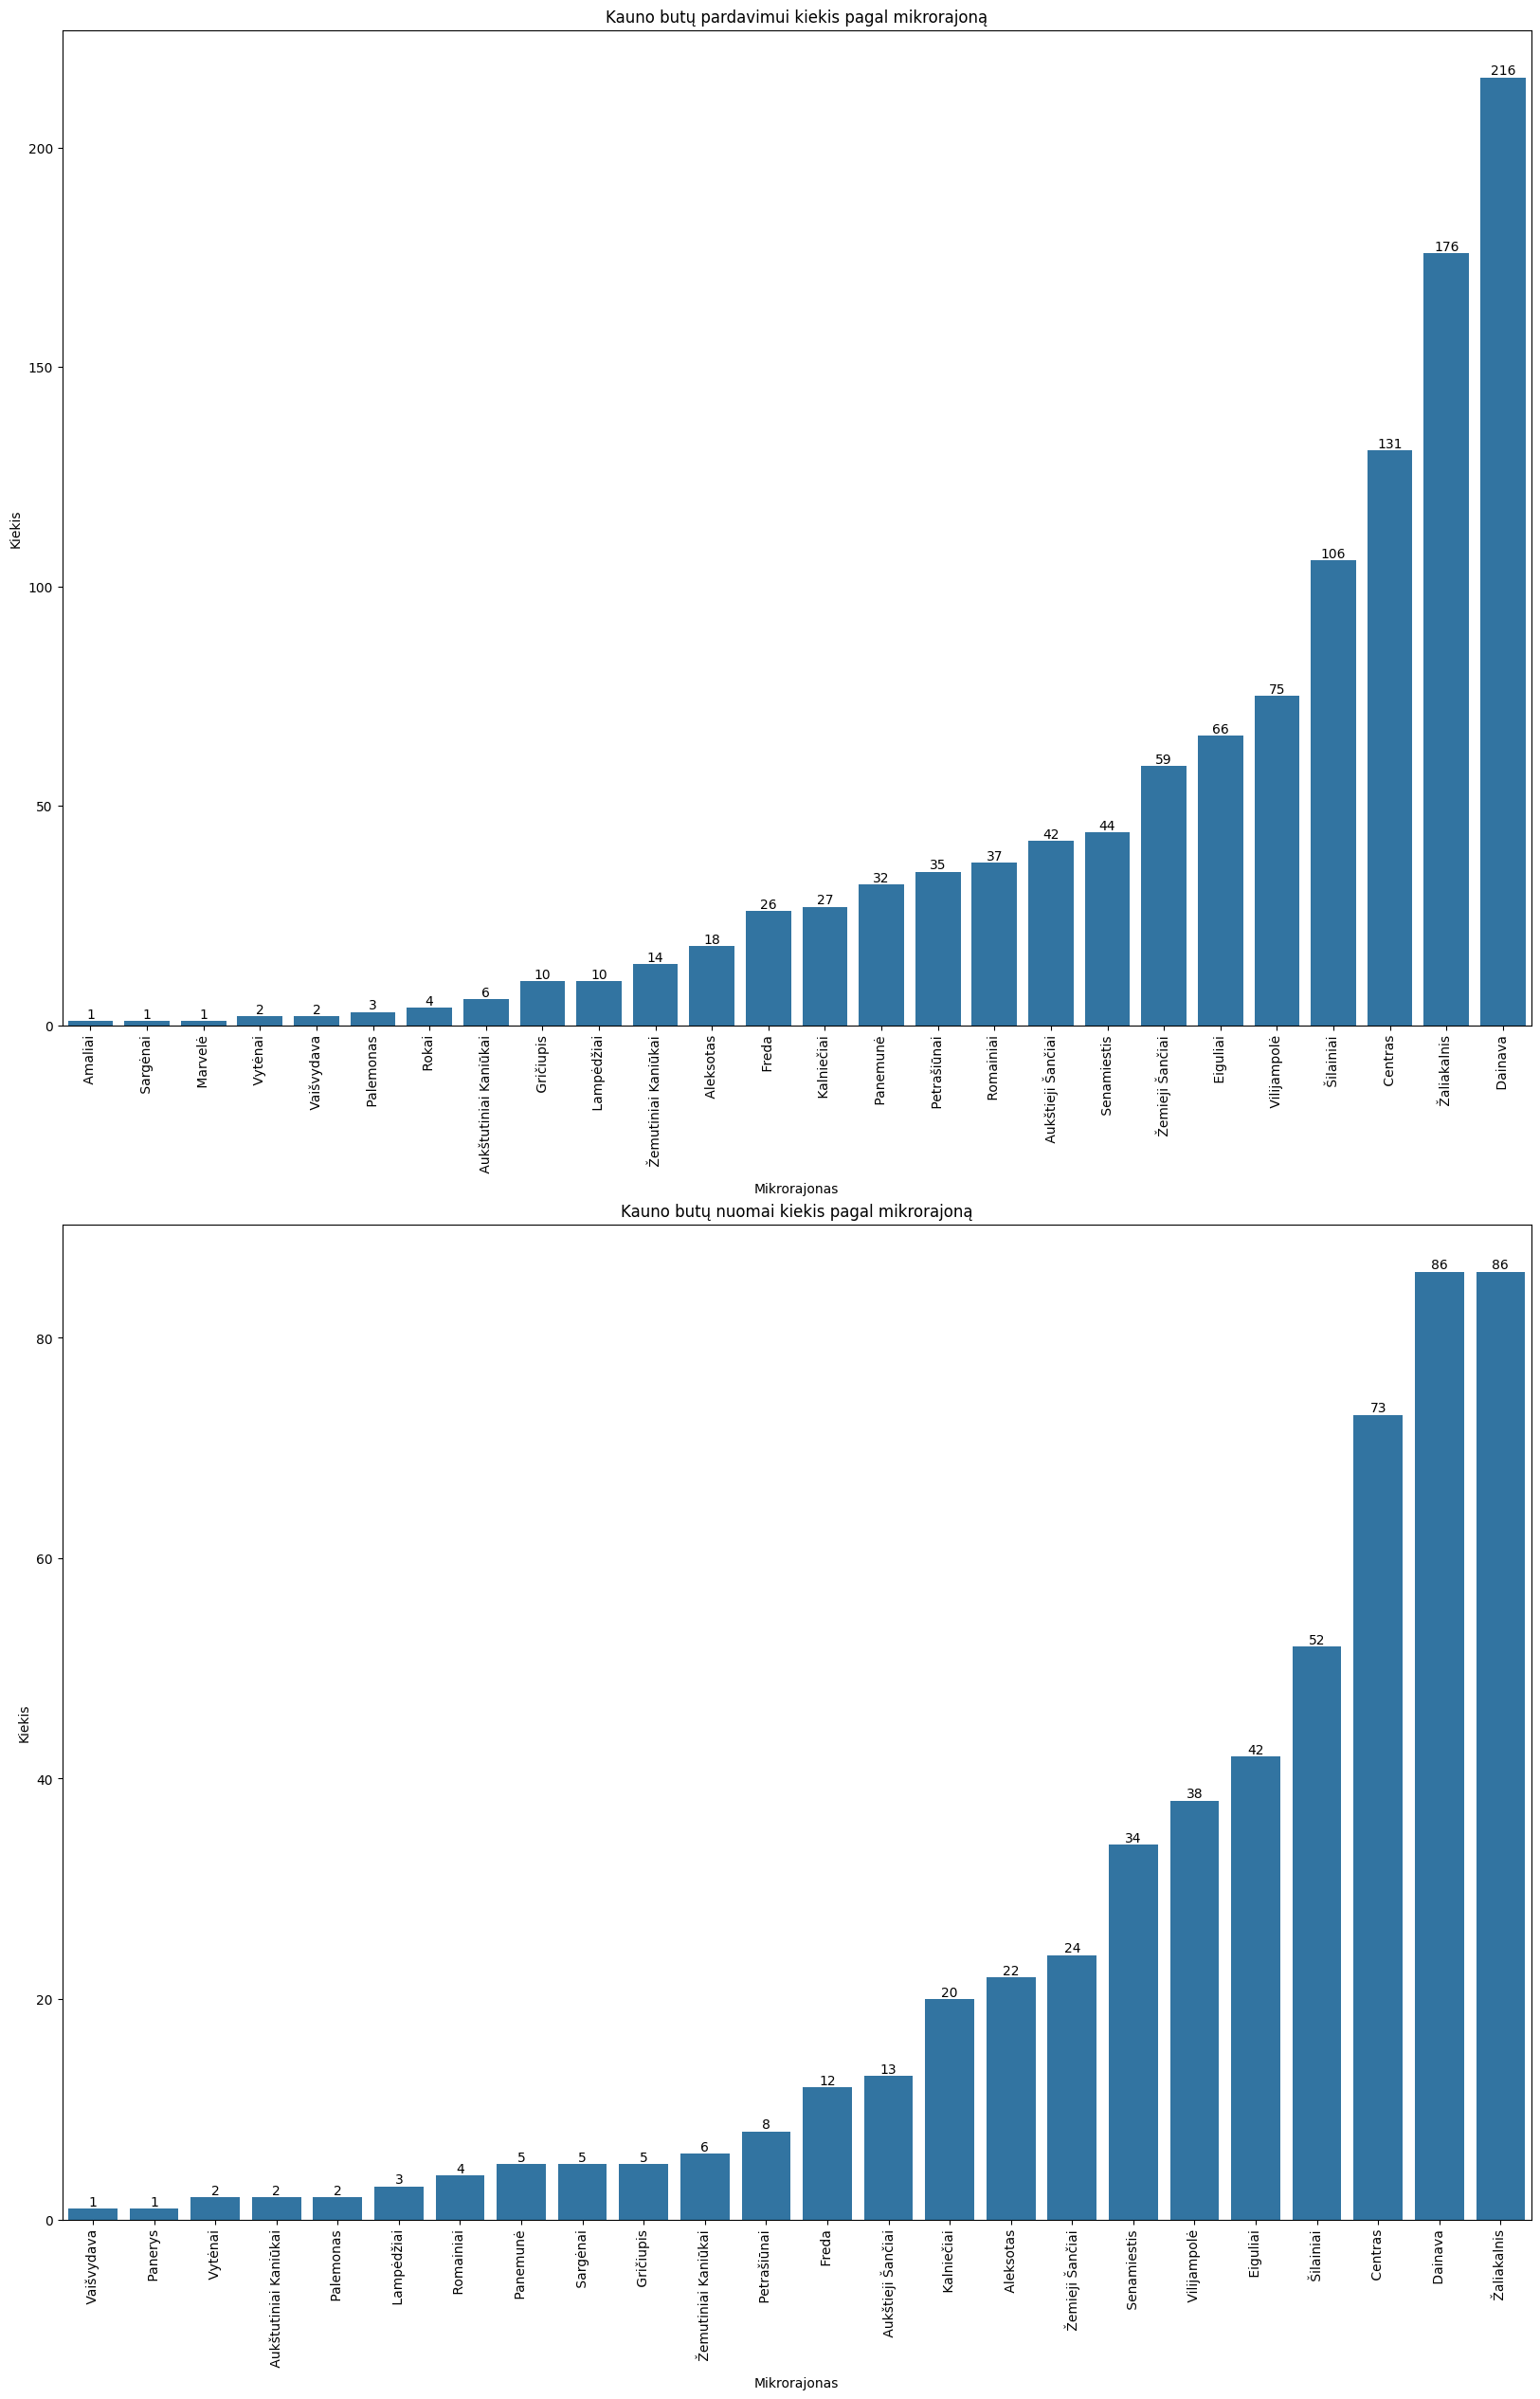

In [25]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_miestas[df_miestas['Tipas'] == 'Butai pardavimui'].groupby(['Mikrorajonas'])['Kaina_n'].count().reset_index().sort_values(by='Kaina_n')
dfy = df_miestas[df_miestas['Tipas'] == 'Butai nuomai'].groupby(['Mikrorajonas'])['Kaina_n'].count().reset_index().sort_values(by='Kaina_n')
axes[0].set_title(f'Kauno butų pardavimui kiekis pagal mikrorajoną')
axes[1].set_title(f'Kauno butų nuomai kiekis pagal mikrorajoną')
ax = sns.barplot(data=dfx,x = 'Mikrorajonas', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Mikrorajonas', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Mikrorajonas',ylabel='Kiekis')
axes[1].set(xlabel='Mikrorajonas',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

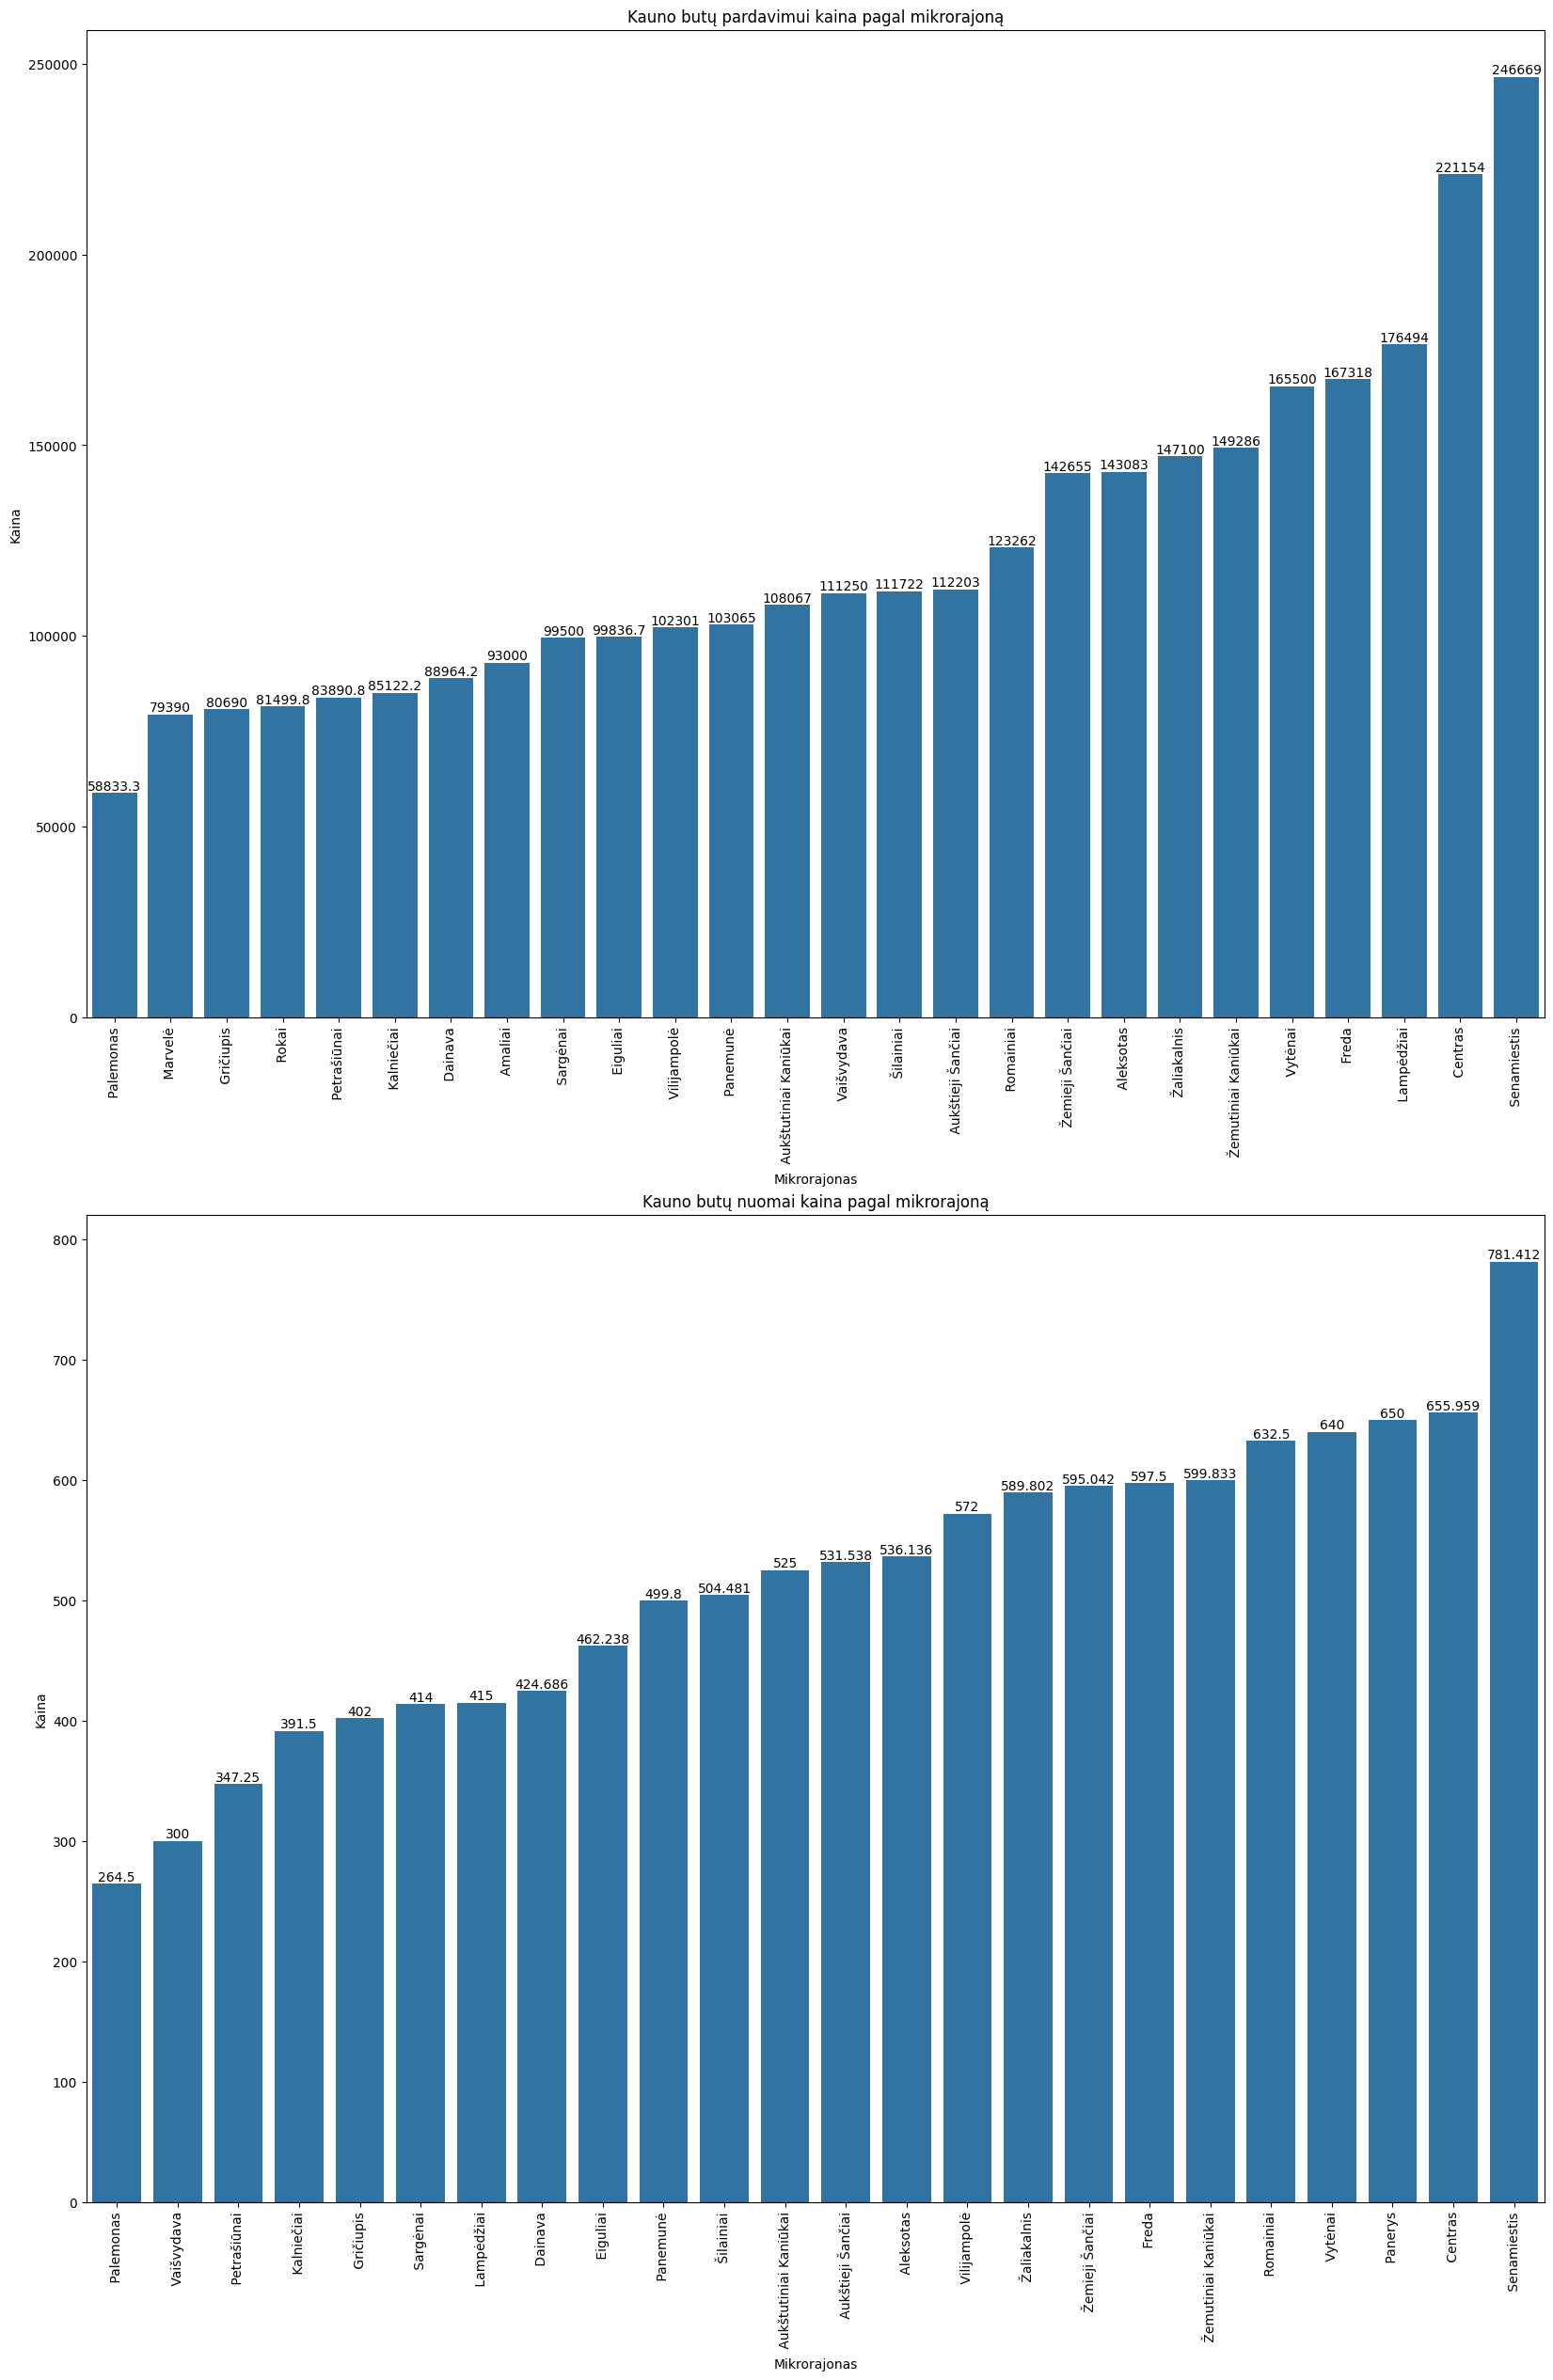

In [26]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_miestas[df_miestas['Tipas'] == 'Butai pardavimui'].groupby(['Mikrorajonas'])['Kaina_n'].mean().reset_index().sort_values(by='Kaina_n')
dfy = df_miestas[df_miestas['Tipas'] == 'Butai nuomai'].groupby(['Mikrorajonas'])['Kaina_n'].mean().reset_index().sort_values(by='Kaina_n')
axes[0].set_title(f'Kauno butų pardavimui kaina pagal mikrorajoną')
axes[1].set_title(f'Kauno butų nuomai kaina pagal mikrorajoną')
ax = sns.barplot(data=dfx,x = 'Mikrorajonas', y='Kaina_n', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Mikrorajonas', y='Kaina_n', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Mikrorajonas',ylabel='Kaina')
axes[1].set(xlabel='Mikrorajonas',ylabel='Kaina')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

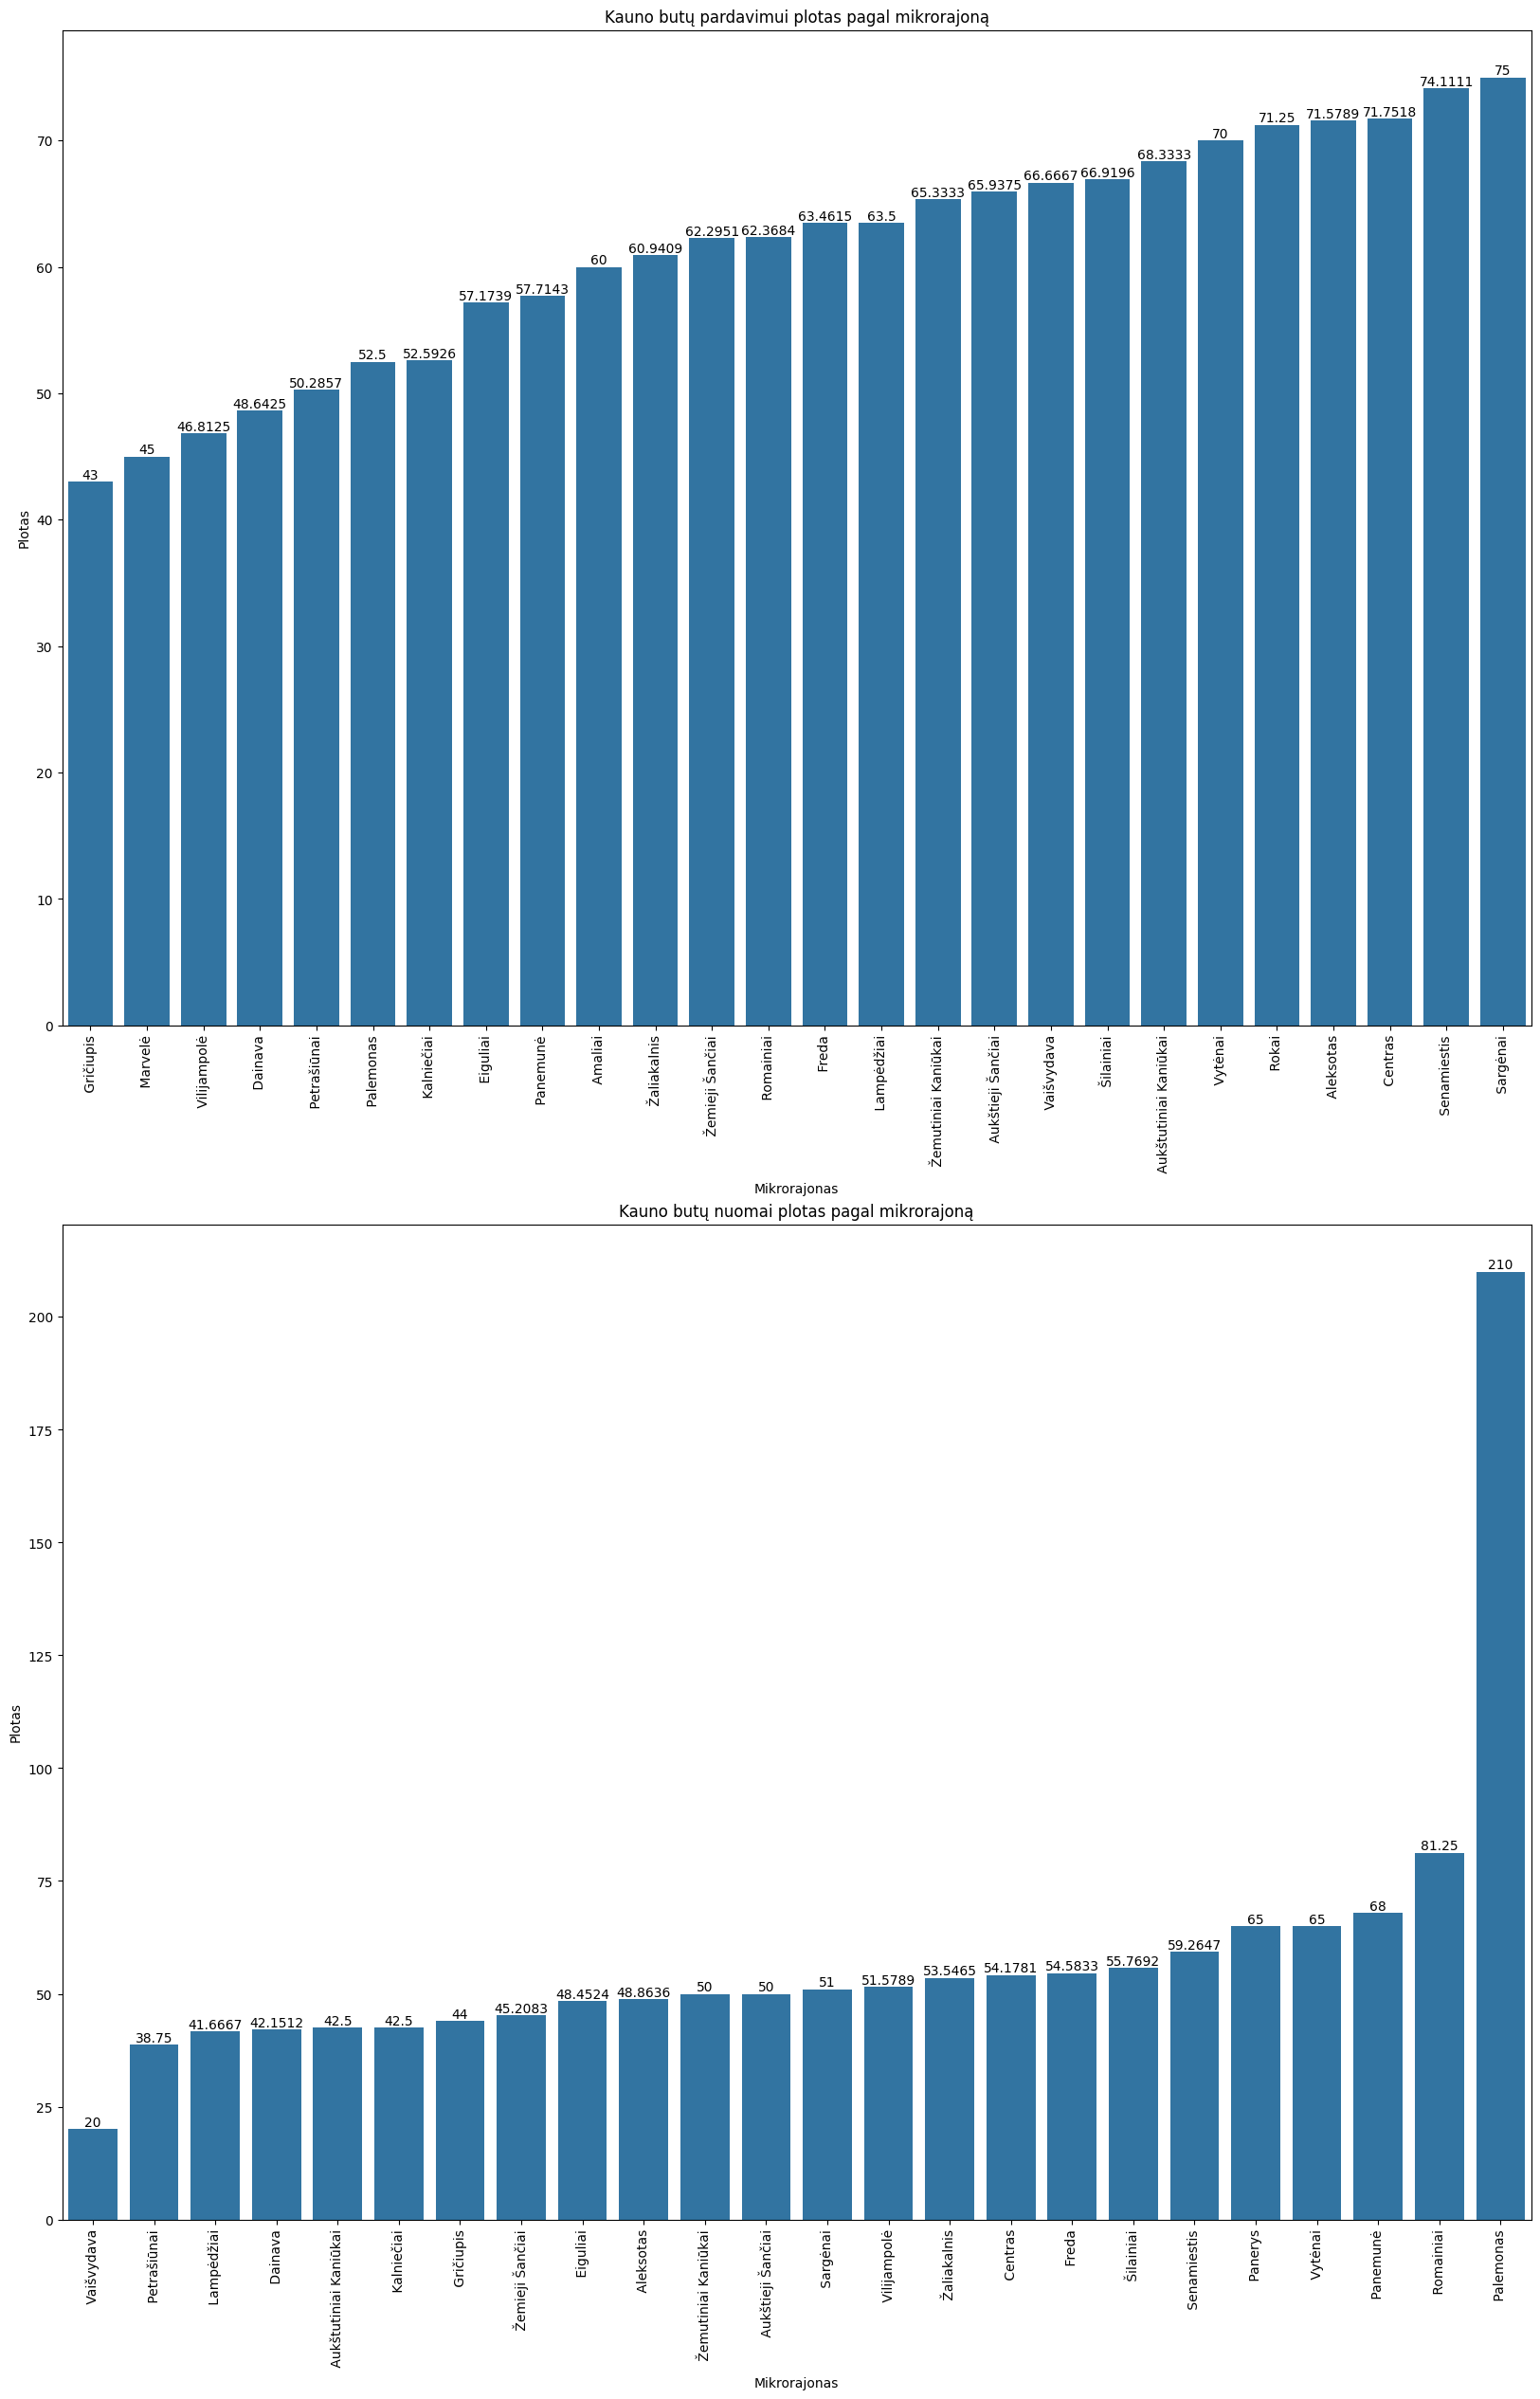

In [40]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_miestas[df_miestas['Tipas'] == 'Butai pardavimui'].groupby(['Mikrorajonas'])['Plotas_group'].mean().reset_index().sort_values(by='Plotas_group')
dfy = df_miestas[df_miestas['Tipas'] == 'Butai nuomai'].groupby(['Mikrorajonas'])['Plotas_group'].mean().reset_index().sort_values(by='Plotas_group')
axes[0].set_title(f'Kauno butų pardavimui plotas pagal mikrorajoną')
axes[1].set_title(f'Kauno butų nuomai plotas pagal mikrorajoną')
ax = sns.barplot(data=dfx,x = 'Mikrorajonas', y='Plotas_group', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Mikrorajonas', y='Plotas_group', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Mikrorajonas',ylabel='Plotas')
axes[1].set(xlabel='Mikrorajonas',ylabel='Plotas')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

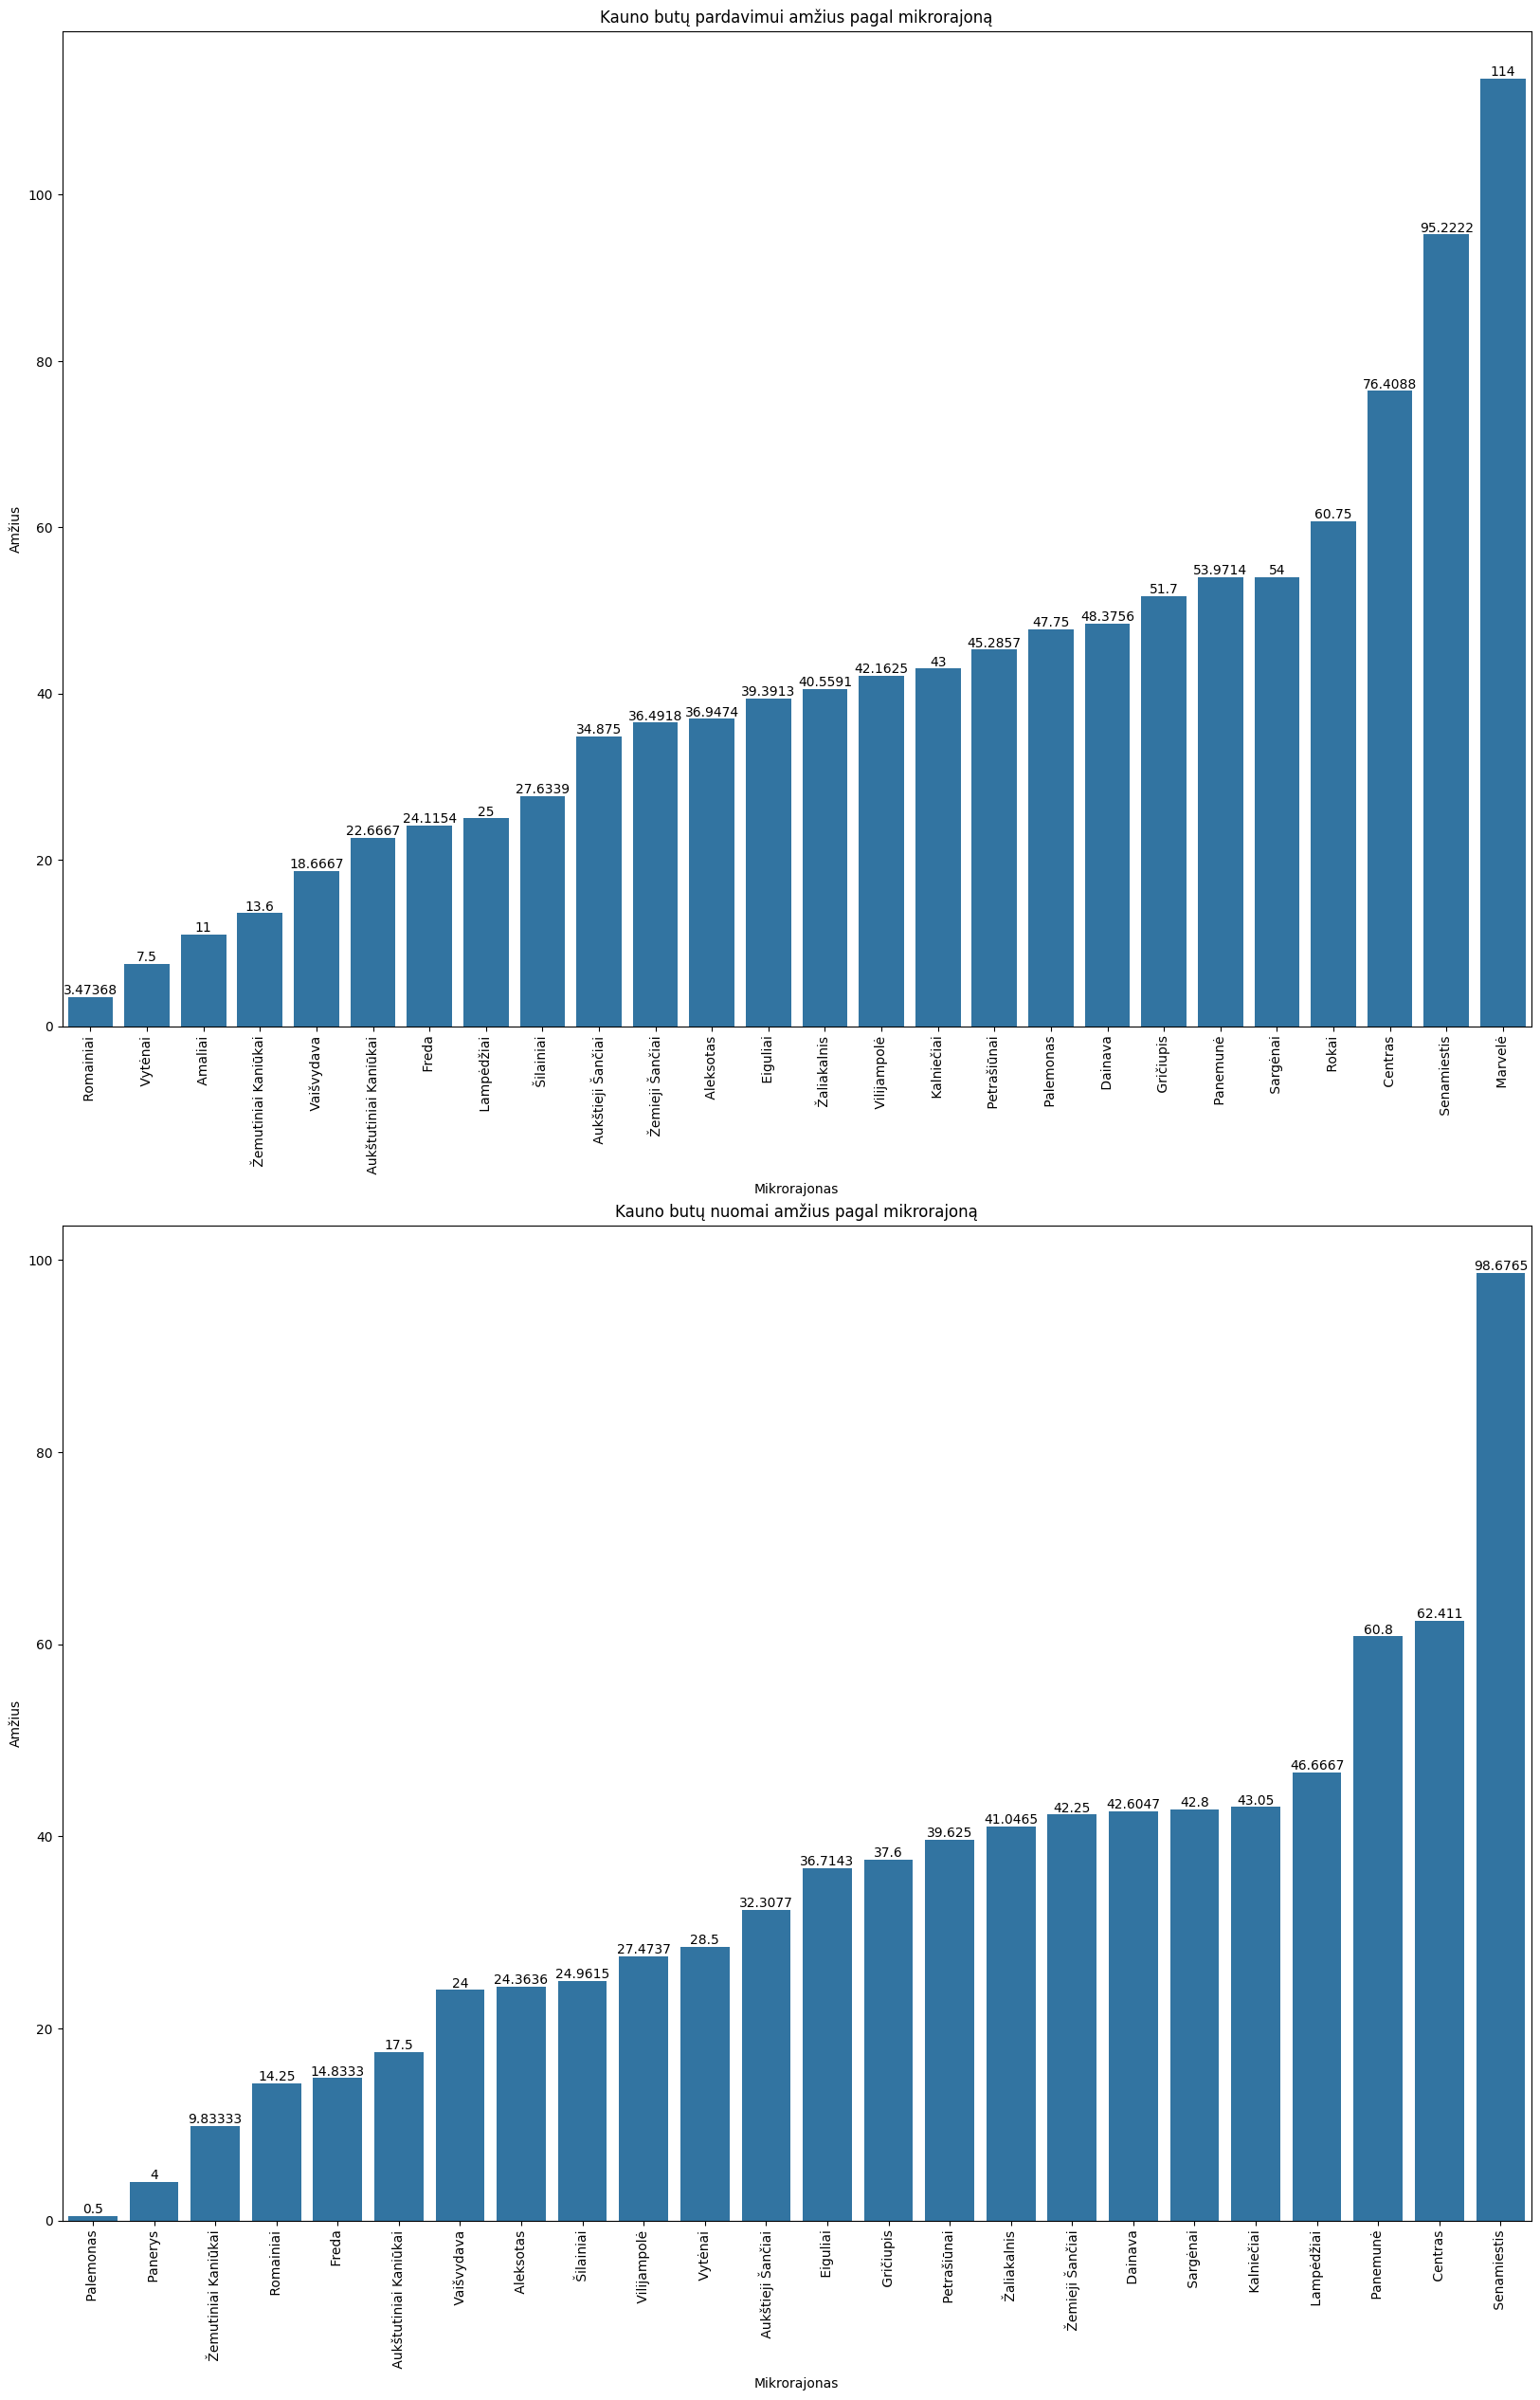

In [41]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_miestas[df_miestas['Tipas'] == 'Butai pardavimui'].groupby(['Mikrorajonas'])['Amžius'].mean().reset_index().sort_values(by='Amžius')
dfy = df_miestas[df_miestas['Tipas'] == 'Butai nuomai'].groupby(['Mikrorajonas'])['Amžius'].mean().reset_index().sort_values(by='Amžius')
axes[0].set_title(f'Kauno butų pardavimui amžius pagal mikrorajoną')
axes[1].set_title(f'Kauno butų nuomai amžius pagal mikrorajoną')
ax = sns.barplot(data=dfx,x = 'Mikrorajonas', y='Amžius', ax=axes[0])
ay = sns.barplot(data=dfy,x = 'Mikrorajonas', y='Amžius', ax=axes[1])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Mikrorajonas',ylabel='Amžius')
axes[1].set(xlabel='Mikrorajonas',ylabel='Amžius')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

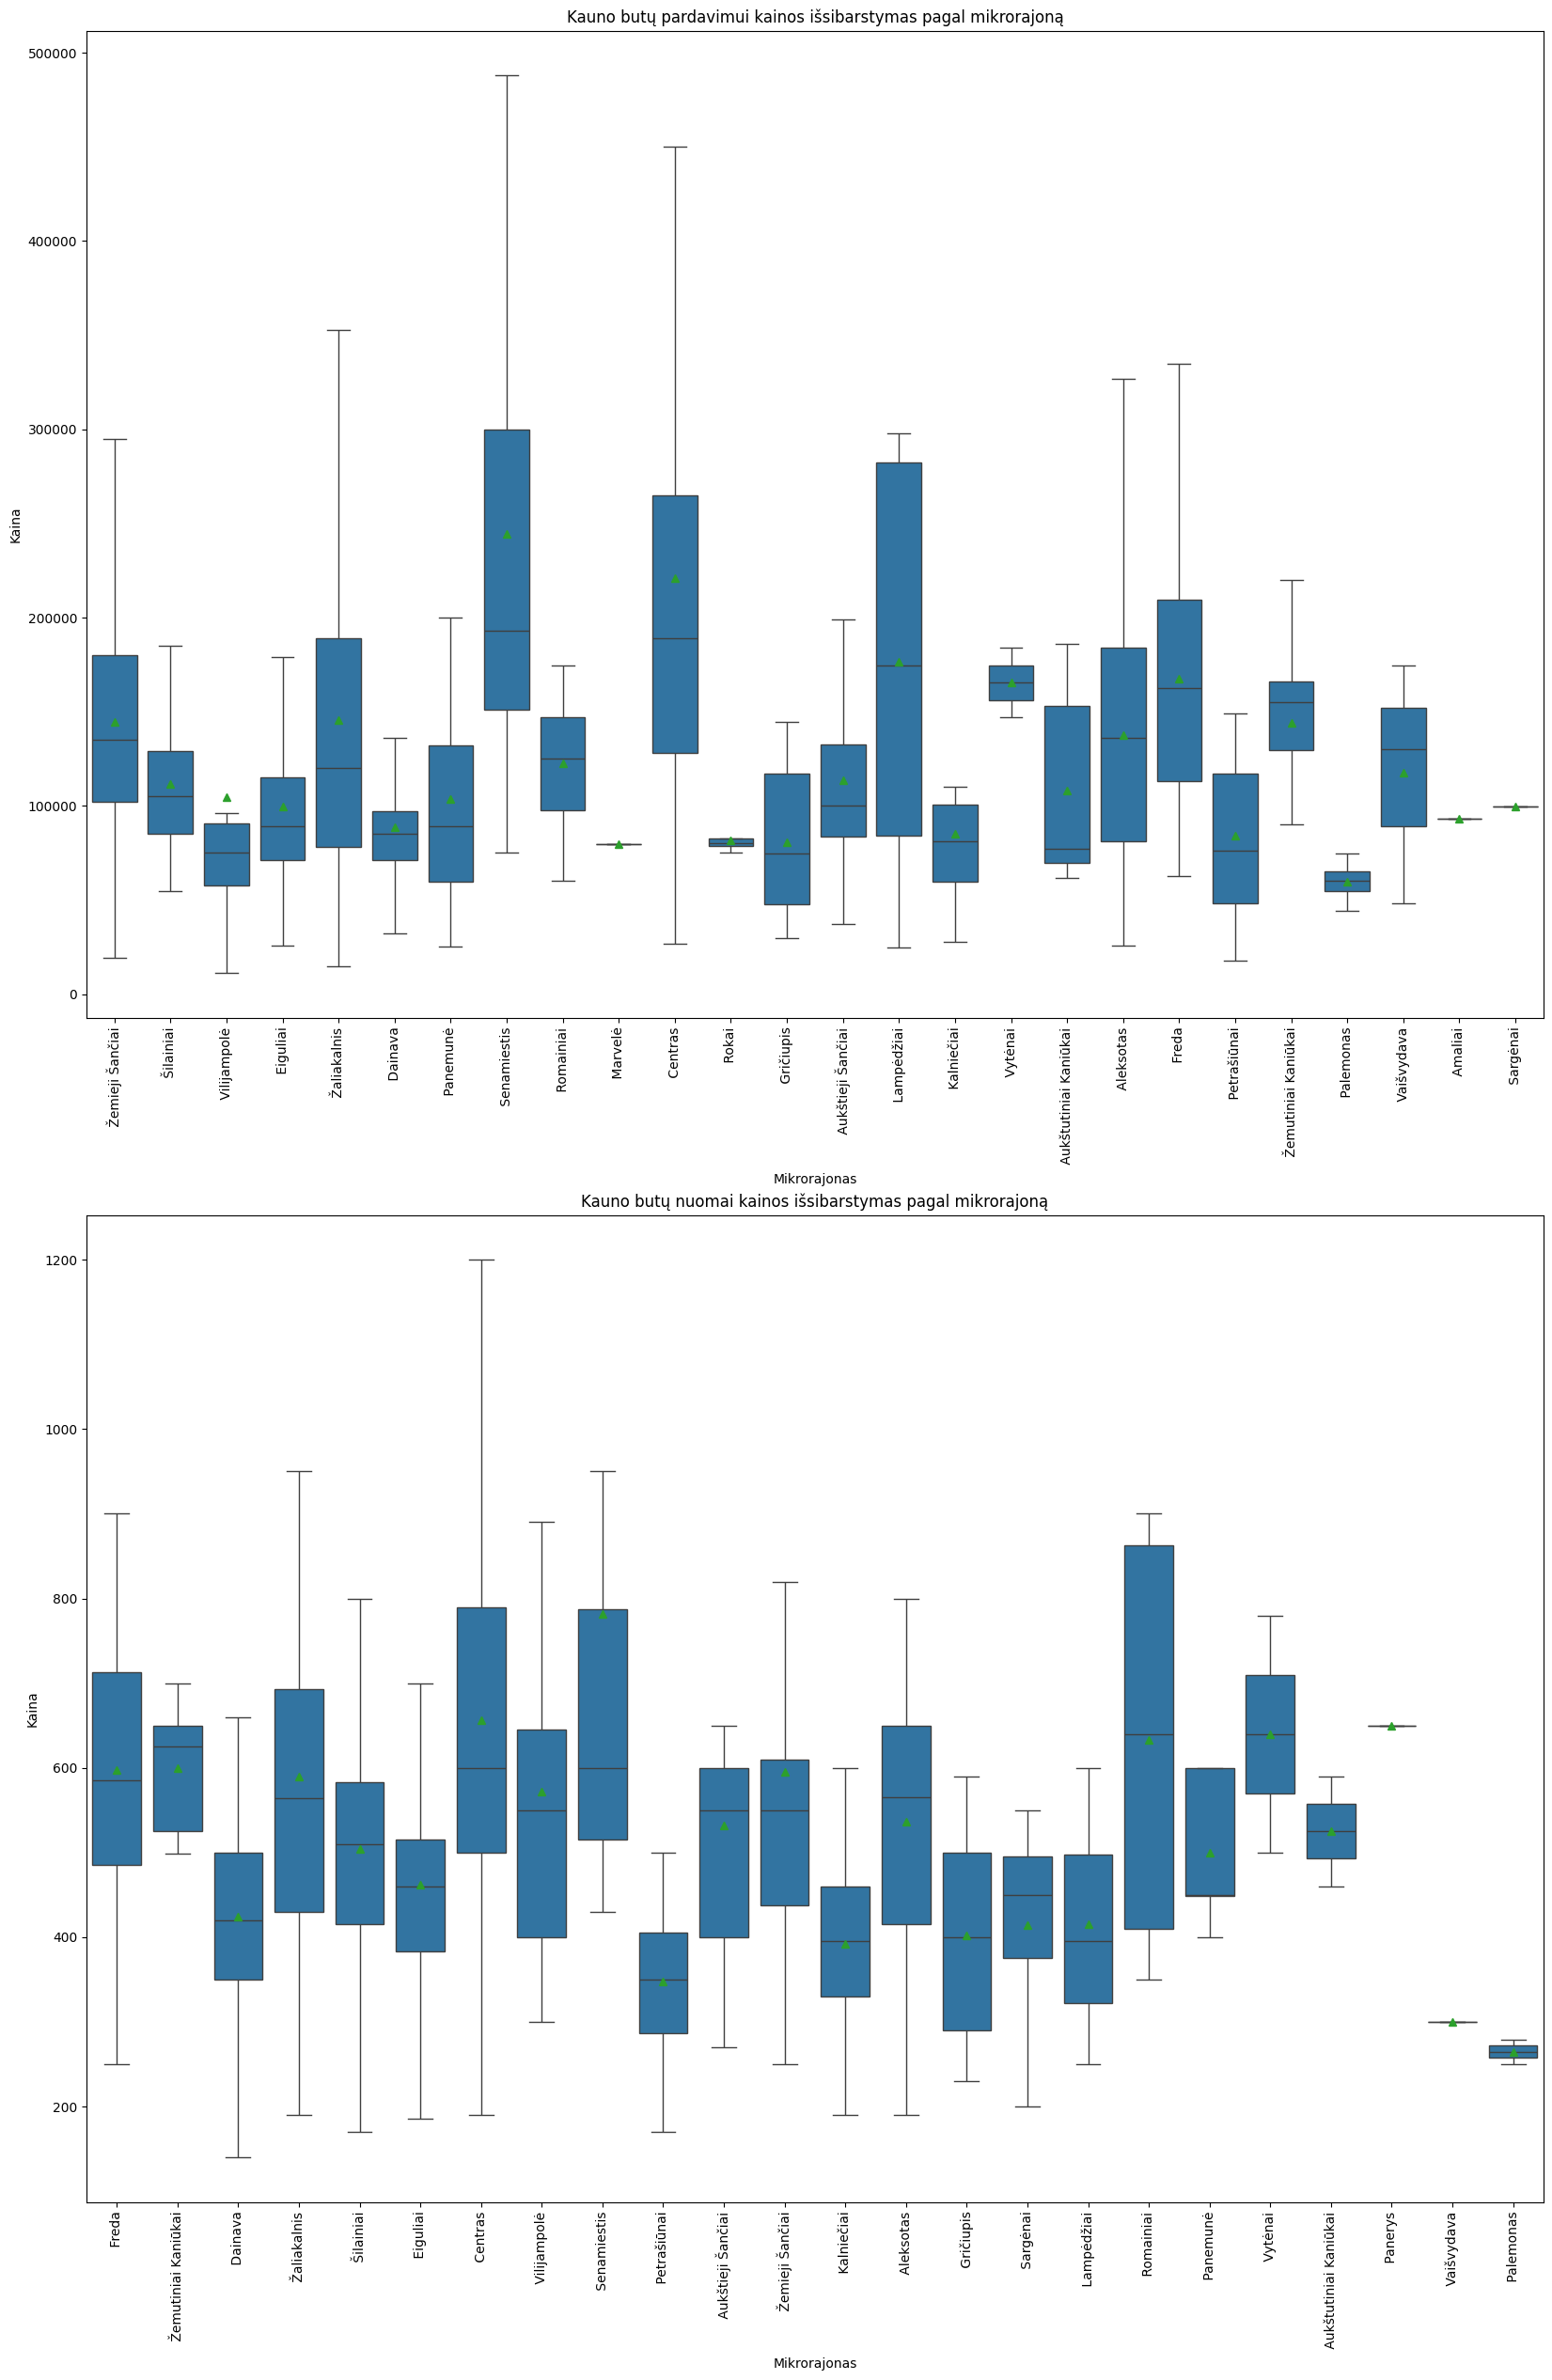

In [44]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_miestas[df_miestas['Tipas'] == 'Butai pardavimui']
dfy = df_miestas[df_miestas['Tipas'] == 'Butai nuomai']
axes[0].set_title(f'Kauno butų pardavimui kainos išsibarstymas pagal mikrorajoną')
axes[1].set_title(f'Kauno butų nuomai kainos išsibarstymas pagal mikrorajoną')
ax = sns.boxplot(data=dfx,x = 'Mikrorajonas', y='Kaina_n', ax=axes[0], showmeans=True, showfliers=False)
ay = sns.boxplot(data=dfy,x = 'Mikrorajonas', y='Kaina_n', ax=axes[1], showmeans=True, showfliers=False)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Mikrorajonas',ylabel='Kaina')
axes[1].set(xlabel='Mikrorajonas',ylabel='Kaina')
plt.show()

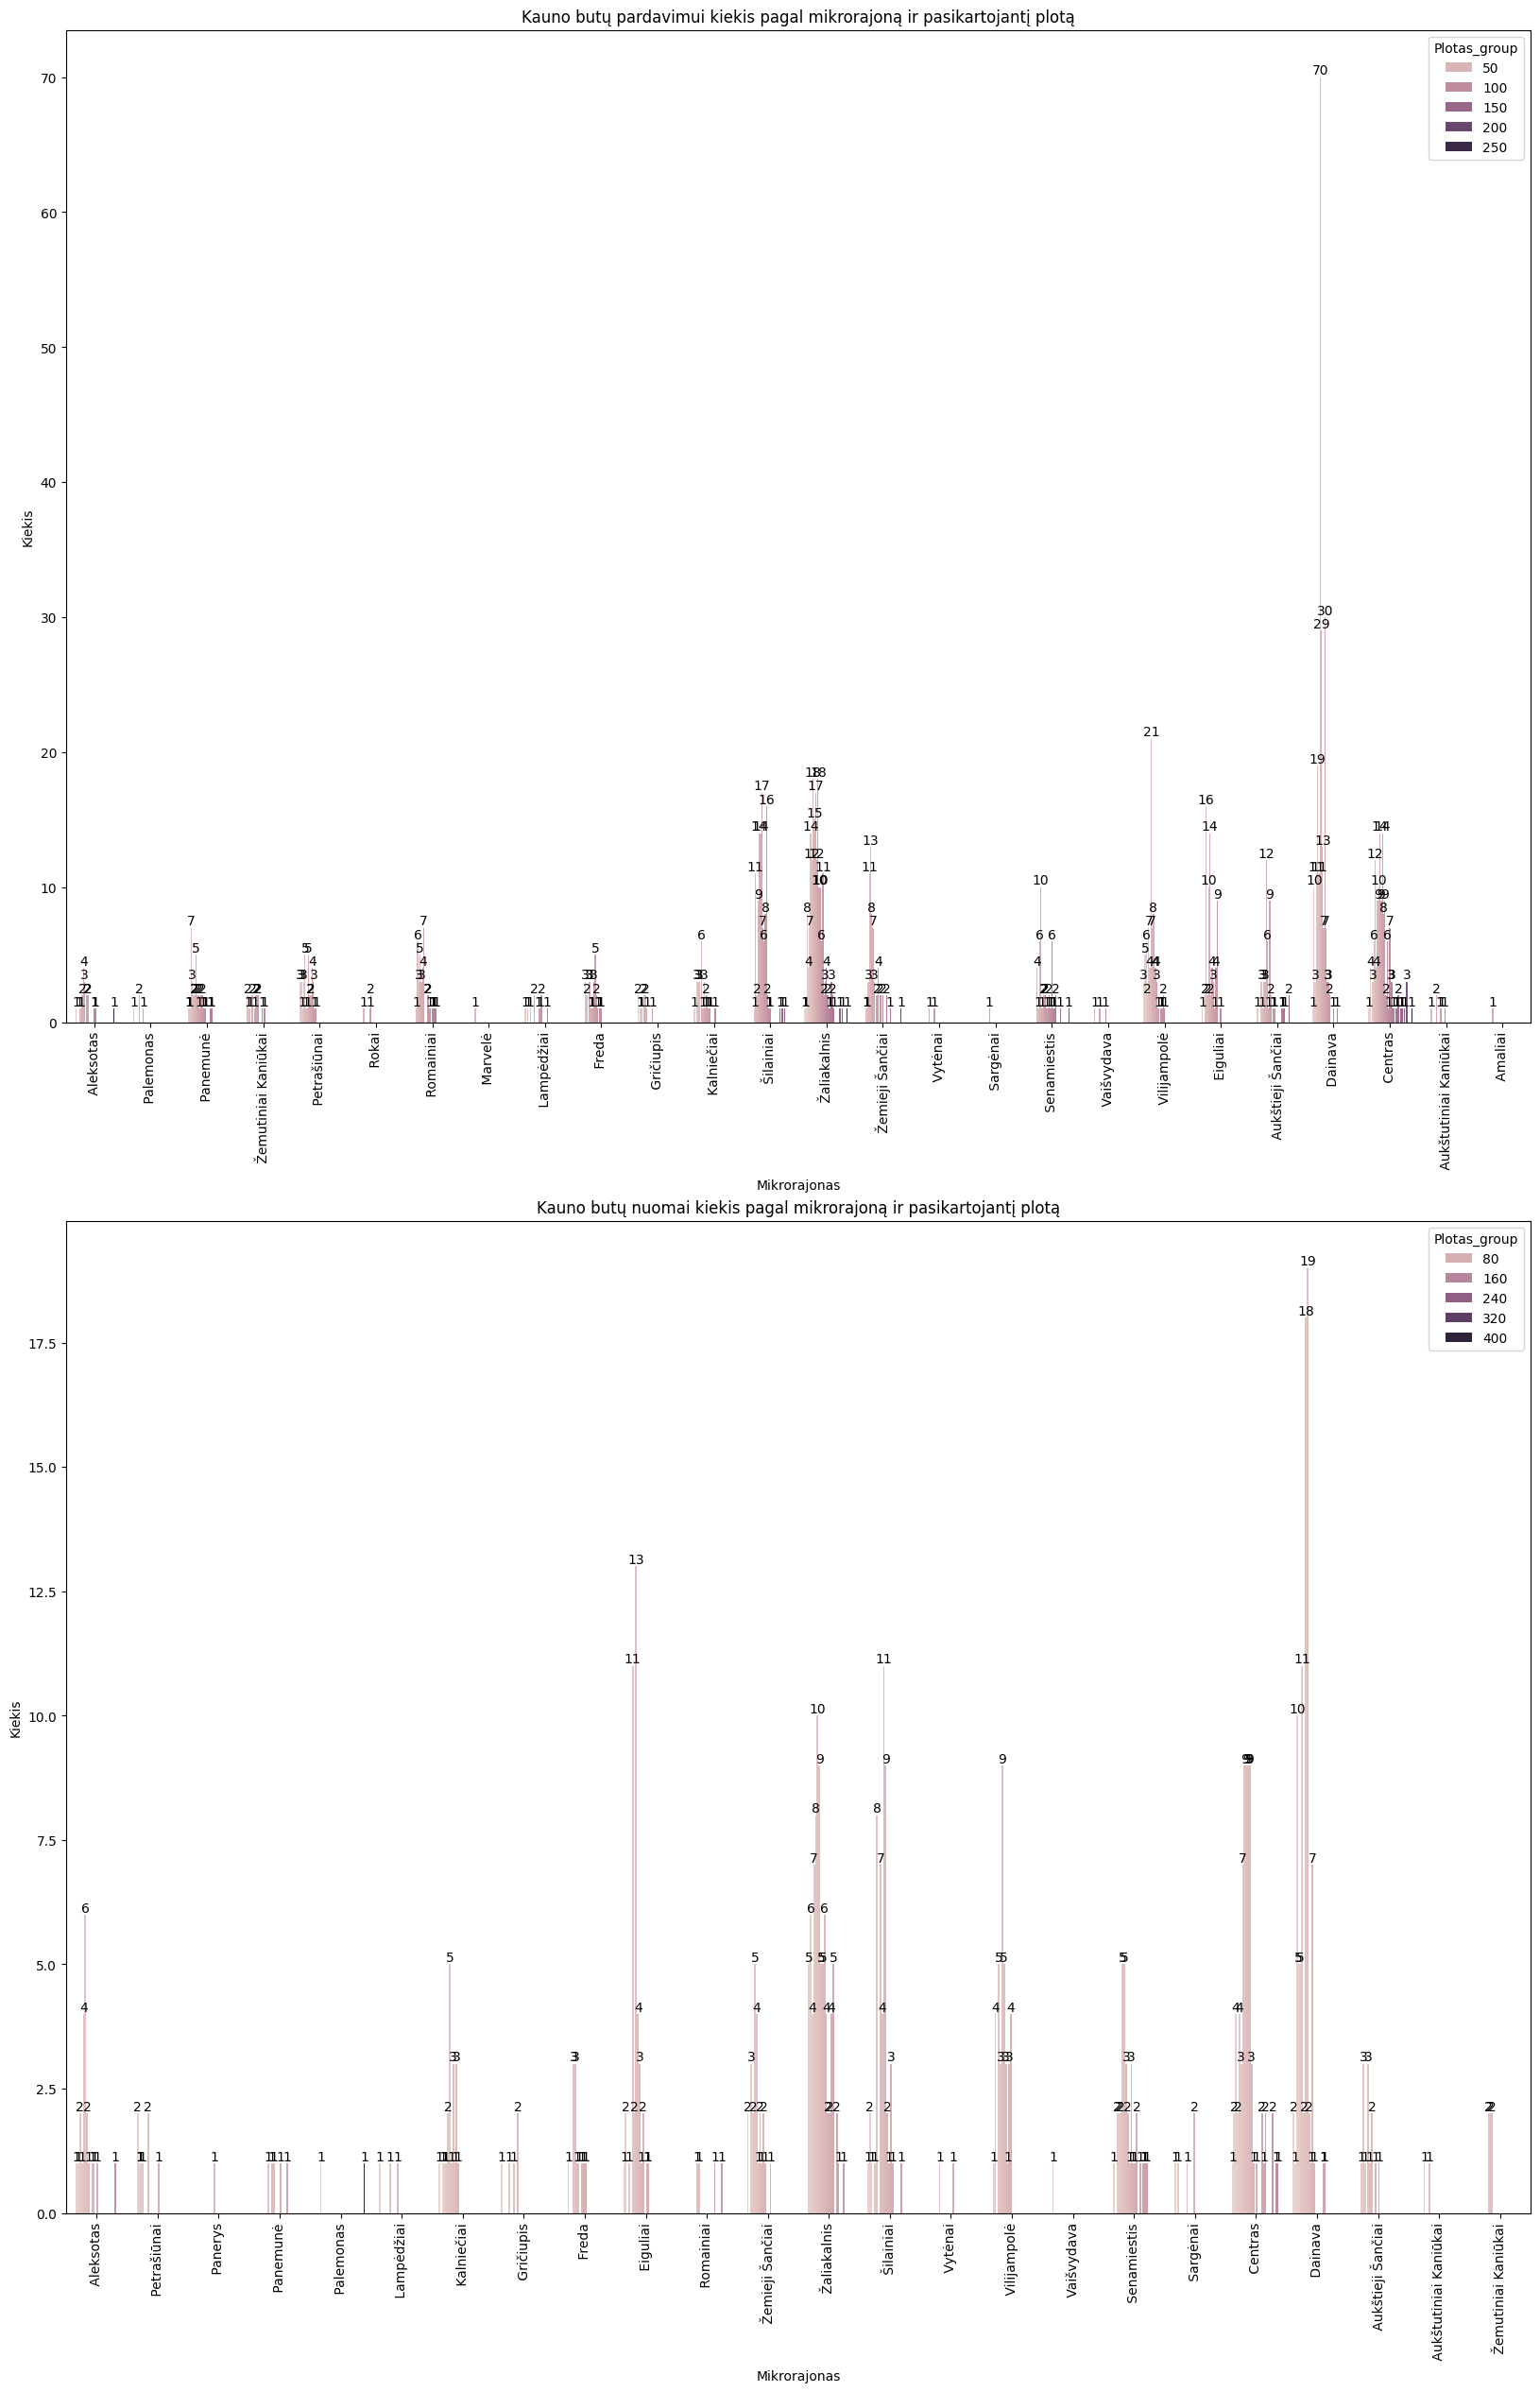

In [50]:
fig, axes = plt.subplots(2,1,figsize=(20,30))
dfx = df_miestas[df_miestas['Tipas'] == 'Butai pardavimui'].groupby(['Mikrorajonas', 'Plotas_group'])['Kaina_n'].count().reset_index().sort_values(by='Kaina_n')
dfy = df_miestas[df_miestas['Tipas'] == 'Butai nuomai'].groupby(['Mikrorajonas', 'Plotas_group'])['Kaina_n'].count().reset_index().sort_values(by='Kaina_n')
axes[0].set_title(f'Kauno butų pardavimui kiekis pagal mikrorajoną ir pasikartojantį plotą')
axes[1].set_title(f'Kauno butų nuomai kiekis pagal mikrorajoną ir pasikartojantį plotą')
ax = sns.barplot(data=dfx,x = 'Mikrorajonas', y='Kaina_n', ax=axes[0], hue='Plotas_group')
ay = sns.barplot(data=dfy,x = 'Mikrorajonas', y='Kaina_n', ax=axes[1], hue='Plotas_group')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set(xlabel='Mikrorajonas',ylabel='Kiekis')
axes[1].set(xlabel='Mikrorajonas',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
for container in ay.containers:
    ay.bar_label(container)
plt.show()

In [110]:

address = "Vilnius, Ozo g. 8"
coordinates = get_coordinates(address)
if coordinates:
    print("Koordinatės:", coordinates)


Koordinatės: (54.7155213, 25.28300912113604)


In [28]:
fig = px.scatter_mapbox(data_frame=aruodas_df, lon='Y', lat='X', zoom=6.1)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(width=800, height=600)
fig.show()

In [174]:
for x, url in zip(list(aruodas_df['coordinates']), list(aruodas_df['URL'])):
    zod = {}
    zod['Coord'] = str(x)
    update_row_in_db('../../../web_scrap.db', 'aruodas', zod, 'URL', url)

Pridėtas naujas stulpelis: Coord
Atnaujinta eilutė, kur URL = 'https://www.aruodas.lt/butai-vilniuje-zirmunuose-riteriu-g-tik-ka-naujai-irengtas-kambariu-butas-1-3472873/': nustatyta Coord = '(54.71684325, 25.291961476410883)'
Atnaujinta eilutė, kur URL = 'https://www.aruodas.lt/butai-palangoje-palangoje-a-mickeviciaus-g-norime-pristatyti-jums-musu-parduodamus-1-3427260/': nustatyta Coord = '(55.9171652, 21.0597236)'
Atnaujinta eilutė, kur URL = 'https://www.aruodas.lt/butai-vilniuje-pasilaiciuose-perkunkiemio-g-brokeriu-paslaugos-nedomina-1-3411527/': nustatyta Coord = '(54.737668150000005, 25.213011185027476)'
Atnaujinta eilutė, kur URL = 'https://www.aruodas.lt/butai-palangoje-palangoje-medvalakio-g-parduodamas-dvieju-kambariu-butas-naujame-1-3481853/': nustatyta Coord = '(55.925825599999996, 21.090597860419805)'
Atnaujinta eilutė, kur URL = 'https://www.aruodas.lt/butai-palangoje-palangoje-medvalakio-g-parduodamas-butas-naujame-kvartale-su-sildomu-1-3485145/': nustatyta Coord = '(5

In [170]:
aruodas_df['coordinates'] = aruodas_df['Adresas_n'].apply(get_coordinates)

No coordinates found for this address Kaunas,  V. Kavolio g.  .
No coordinates found for this address  Vijūkų k.,  Plytupio g.  .
No coordinates found for this address  Vijūkų k.,  Plytupio g.  .
No coordinates found for this address  Jonučių II k.,  Versmės g. 24.
No coordinates found for this address  Jonučių II k.,  Versmės g. 24.
No coordinates found for this address  Giraitės k.,  Žilvičių g. 16.
No coordinates found for this address  Pabradės m.,  Arnionių g. 56.
No coordinates found for this address  Ventos m.,  Ventos g. 22.
No coordinates found for this address  Pagynės k.,  Kikonių g.  .
No coordinates found for this address  Dovilų mstl.,  Klaipėdos g. 26.
No coordinates found for this address  Gargždų m.,  Melioratorių g. 12.
No coordinates found for this address  Baisogalos mstl.,  Grinkiškio g. 9.
No coordinates found for this address  Vaidotų k.,  Statybininkų g. 6.
No coordinates found for this address  Priekulės m.,  Žalgirio g. 1.
No coordinates found for this address